In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 13.5 MB/s eta 0:00:00


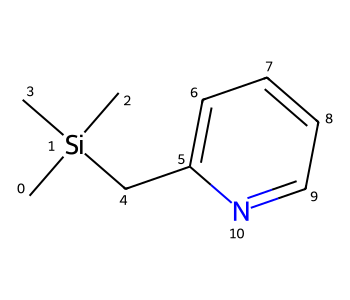

In [ ]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles('CC1=NC2=CC=CC=C2C=C1')
mol2 = Chem.MolFromSmiles('CC1=CC(=S)C2=CC=CC=C2N1')
mol3 = Chem.MolFromSmiles('CC1=CC(=O)C2=CC=CC=C2N1')
mol4 = Chem.MolFromSmiles('C[Si](C)(C)CC1=CC=CC=N1')

opts = Draw.MolDrawOptions()
opts.addAtomIndices = True
Draw.MolToImage(mol4,size=(350,300),options=opts)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

bi = {}
fp = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol4, radius=3, fromAtoms=[10], bitInfo=bi, nBits=1024)
print(len(fp.GetOnBits()))

4


In [ ]:
tpsl[1,2,0,3]

TypeError: list indices must be integers or slices, not tuple

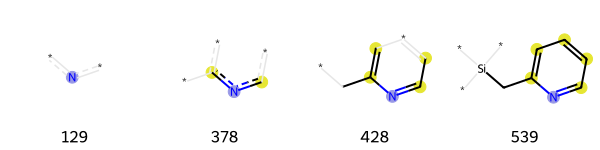

In [ ]:
tpsl = [(mol4, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits( (tpsl[1], tpsl[2], tpsl[0], tpsl[3]), molsPerRow = 4, legends = [str(x) for x in fp.GetOnBits()][:])

4


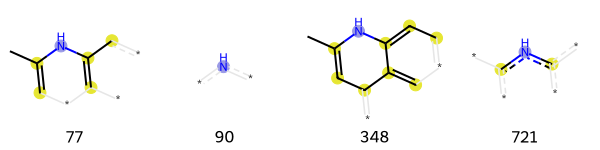

In [ ]:
bi1 = {}
fp1 = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol2, fromAtoms=[11], radius=3, bitInfo=bi1, nBits=1024)
print(len(fp1.GetOnBits()))

tpsl1 = [(mol2, x, bi1) for x in fp1.GetOnBits()]
Draw.DrawMorganBits( tpsl1[:], molsPerRow = 4, legends = [str(x) for x in fp1.GetOnBits()][:])

4


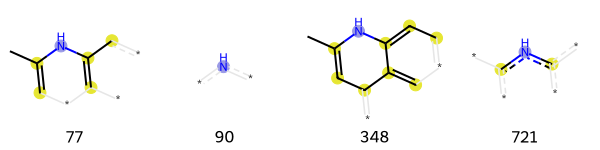

In [ ]:
bi2 = {}
fp2 = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol3, fromAtoms=[11], radius=3, bitInfo=bi2, nBits=1024)
print(len(fp2.GetOnBits()))

tpsl2 = [(mol3, x, bi2) for x in fp2.GetOnBits()]
Draw.DrawMorganBits( tpsl2[:], molsPerRow = 4, legends = [str(x) for x in fp2.GetOnBits()][:])

4


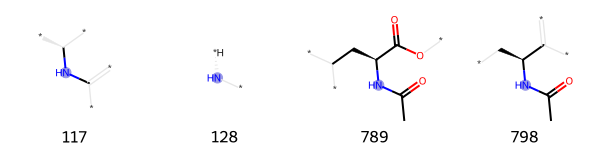

In [ ]:
bi3 = {}
fp3 = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol4, fromAtoms=[9], radius=3, bitInfo=bi3, nBits=1024)
print(len(fp3.GetOnBits()))

tpsl3 = [(mol4, x, bi3) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(tpsl3[:], molsPerRow = 4, legends = [str(x) for x in fp3.GetOnBits()][:])

In [ ]:
tpsl2[0][2]

{77: ((11, 2),), 90: ((11, 0),), 348: ((11, 3),), 721: ((11, 1),)}

In [ ]:
[str(x) for x in fp3.GetOnBits()][:]

['128', '780', '855']

In [ ]:
dic = {}
for x in tpsl3[0][2].items():
  dic[x[1][0][1]] = x[0]

In [ ]:
dic

{0: 128, 2: 780, 1: 855}

In [ ]:
y = [z[1] for z in sorted(dic.items())]

In [ ]:
while len(y) != 4:
  y.append(-100)

In [ ]:
y

[128, 855, 780, -100]

In [ ]:
import re
smiles = 'C1=CC=C(C=C1)P(=NS(=O)(=O)C2=CC=C(C=C2)Cl)(C3=CC=CC=C3)C4=CC=CC=C4'
#position = re.sub(r'[^\w]', '', smiles)
position = re.sub(r'[\dlrn^\w]', '', smiles)
position.index('N')

ValueError: substring not found

'C1CCCCC1PNSOOC2CCCCC2ClC3CCCCC3C4CCCCC4'

##Make fingerprints

In [ ]:
def make_fingerprint(smiles):
  edit_smiles = re.sub(r'[^\w]', '', smiles)
  edit_smiles = re.sub(r'[\dlrniH]', '', edit_smiles)
  position = edit_smiles.index('N')

  mol = Chem.MolFromSmiles(smiles)

  bi = {}
  fp = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, fromAtoms=[position], radius=3, bitInfo=bi, nBits=1024)

  tpsl = [(mol, x, bi) for x in fp.GetOnBits()]

  dic = {}
  for radius_fp in tpsl[0][2].items():
    dic[radius_fp[1][0][1]] = radius_fp[0]

  list_fp = [n_fp[1] for n_fp in sorted(dic.items())]

  while len(list_fp) != 4:
    list_fp.append(-100)

  return list_fp

make_fingerprint('C[Si](C)(C)CC1=CC=CC=N1')

[378, 428, 129, 539]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/SMILES_target.xlsx', decimal=',')

In [ ]:
df_1N = df[df['Solvent'].notna()].query('N_count == 1').dropna(axis = 1).drop_duplicates('SMILES')

In [ ]:
df_1N

Unnamed: 0                     InChiKey  \
0            12  MCRMUCXATQAAMN-HNNXBMFYSA-N   
2            36  JRKMVLFFQOHRHM-VHSXEESVSA-N   
4            38  OISVCGZHLKNMSJ-UHFFFAOYSA-O   
9            43  OISVCGZHLKNMSJ-UHFFFAOYSA-N   
22           92  SMUQFGGVLNAIOZ-UHFFFAOYSA-N   
..          ...                          ...   
929        2963  VOWZNBNDMFLQGM-UHFFFAOYSA-N   
933        2997  BRNULMACUQOKMR-UHFFFAOYSA-N   
935        2999  SQTIYIVNQVOBNL-UHFFFAOYSA-M   
937        3005  XRGCYDCLAPCXLB-UHFFFAOYSA-N   
939        3007  QUSNBJAOOMFDIB-UHFFFAOYSA-N   

                                                SMILES  N_count  \
0    C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...      1.0   
2                              C[C@H]1CC[C@H]2CCCCN2C1      1.0   
4                                  CC1=[NH+]C(=CC=C1)C      1.0   
9                                      CC1=NC(=CC=C1)C      1.0   
22                                CC1=NC2=CC=CC=C2C=C1      1.0   
..                                                 ...      ...   
929                                 CC1=CC(=C(C=C1)C)N      1.0   
933                                           C1CSCCN1      1.0   
935  C[N+]1=CC=C(C=C1)C2=CC=CS2.C(F)(F)(F)S(=O)(=O)...      1.0   
937                C1=CC=C(C=C1)OC2=CC=C(C=C2)NCC(=O)O      1.0   
939                                                CCN      1.0   

             Solvent Target1  
0               DMSO  -292.6  
2              CDCl3   -53.2  
4    TFA(C=14.5MOL%)    -177  
9             CHCl3    -69.1  
22         (CH3)2SO4   -73.1  
..               ...     ...  
929          DMSO-D6  -328.6  
933          DMSO-D6  -343.4  
935          DMSO-D6  -187.9  
937          DMSO-D6  -321.9  
939              H2O  -352.4  

[243 rows x 6 columns]

In [ ]:
series = df_1N.SMILES

In [ ]:
with open("file_smiles.txt", "w") as output:
      for row in series:
        output.write(str(row) + '\n')

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!git clone https://github.com/toshikiochiai/NPVAE.git

fatal: destination path 'NPVAE' already exists and is not an empty directory.


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!conda env update -n base -f /content/NPVAE/env/npvae_env.yml

Channels:
 - rdkit
 - pytorch
 - dglteam
 - bioconda
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: | / failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs: 
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37h06a4308_1
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - alembic==1.8.1=py37h06a4308_0
    - anaconda==2020.02=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.12=py37_0
    - anaconda-project==0.8.4=py_0
    - antlr-python-runtime==4.9.3=pyhd8ed1ab_1
    - appdirs==1.4.4=pyhd3eb1b0_0
    - argh==0.26.2=py37_0
    - asn1crypto==1.3.0=py37_0
    - astroid==2.3.3=py37_0
    - astropy==4.0=py37h7b6447c_0
    - atomicwrites==1.3.0=py37_1
    - attrs==19.3.0=py_0
    - autopep8==1.4.4=py_0
    - babel==2.8.0=py_0
    - backcall==0.1.0=py37_0
    - backports==1.0=py_2
    - backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
    - backports.shutil_get_terminal_size==1.0.0=py37_

In [ ]:
!source activate base
!conda activate base


CondaError: Run 'conda init' before 'conda activate'



In [ ]:
!python /content/NPVAE/preprocessing.py --smiles_path /content/file_smiles.txt --save_path ./save_data

Traceback (most recent call last):
  File "/content/NPVAE/preprocessing.py", line 2, in <module>
    from model.utils import *
  File "/content/NPVAE/model/utils.py", line 7, in <module>
    import dgl
  File "/usr/local/lib/python3.10/site-packages/dgl/__init__.py", line 16, in <module>
    from . import (
  File "/usr/local/lib/python3.10/site-packages/dgl/dataloading/__init__.py", line 13, in <module>
    from .dataloader import *
  File "/usr/local/lib/python3.10/site-packages/dgl/dataloading/dataloader.py", line 27, in <module>
    from ..distributed import DistGraph
  File "/usr/local/lib/python3.10/site-packages/dgl/distributed/__init__.py", line 5, in <module>
    from .dist_graph import DistGraph, DistGraphServer, edge_split, node_split
  File "/usr/local/lib/python3.10/site-packages/dgl/distributed/dist_graph.py", line 11, in <module>
    from .. import backend as F, graphbolt as gb, heterograph_index
  File "/usr/local/lib/python3.10/site-packages/dgl/graphbolt/__init__.py",

In [ ]:
!python /content/NPVAE/calculate_z.py --smiles_path /content/file_smiles.txt --prepared_path ./save_data --load_path ./param_data --save_path ./output_data

In [ ]:
!conda list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
archspec                  0.2.2              pyhd8ed1ab_0    conda-forge
boltons                   23.1.1             pyhd8ed1ab_0    conda-forge
brotli-python             1.1.0           py310hc6cd4ac_1    conda-forge
bzip2                     1.0.8                hd590300_5    conda-forge
c-ares                    1.24.0               hd590300_0    conda-forge
ca-certificates           2023.11.17           hbcca054_0    conda-forge
certifi                   2023.11.17         pyhd8ed1ab_0    conda-forge
cffi                      1.16.0          py310h2fee648_0    conda-forge
charset-normalizer        3.3.2              pyhd8ed1ab_0    conda-forge
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
conda         

In [ ]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 17.3 MB/s eta 0:00:00


In [ ]:
import pickle
with open("z_list", "rb")as f:
  z_list = pickle.load(f)

In [ ]:
len(z_list[0][0])

256

In [ ]:
y_list = []

with open("file_smiles.txt", "r")as f:
  for smile in f:
    y_list.append(make_fingerprint(smile))

C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(=O)O

C[C@H]1CC[C@H]2CCCCN2C1

CC1=[NH+]C(=CC=C1)C

CC1=NC(=CC=C1)C

CC1=NC2=CC=CC=C2C=C1

CC(C)N/C(=C\C(=O)C)/C

[B-](F)(F)(F)F.CC1(CCCC([N+]1=O)(C)C)C

C1CCC2C(C1)CCCN2

C1CCC2C(C1)CCC[NH2+]2

COC(=O)CC[C@@H](C(=O)OC)[NH3+].[Cl-]

C[C@@H]1CCCC[C@@H]1NC(C)C2=CC=CC=C2

CN(C)P(F)F

CC(C)(C)[Sn](C(C)(C)C)(C(C)(C)C)N1C=CC2=CC=CC=C21

CCNS(=O)(=O)C1=CC=CC=C1

CN1C(C2=C3C(=CC(=C2C4=C1C5=CC6=C(C=C5C=C4)OCO6)OC)OCO3)O

CCN(CCOC=O)C=O

CCC1=C2CCCCC2=NC3=C1CCCC3

C(C(=O)O)N

C(C(=O)O)[NH3+]

CC1=NC2=CC=CC=C2[Se]1

COC1=CC=C(C=C1)NS(=O)(=O)C2=CC=CC=C2

CC(C)C1=CC=CC=N1

C1=CC=C2C(=C1)C=CC=C2N=C=O

CC1=CC=C(C=C1)N=C=C(C)C

C(CCCCCC(O)(P(=O)(O)O)P(=O)(O)O)CCCCCN

C1=CC=NC(=C1)/C=C(/C2=CC=C(C=C2)Cl)\O

C1CCC2=C(C1)C=CC=N2

CCNC

CC[NH2+]C

C1=CC=C(C=C1)C(=O)/C=C\2/C3=CC=CC=C3C4=CC=CC=C4N2

CC(C)(C)N(C)C

CC(C)(C)[NH+](C)C

CC(C)/C(=N\O)/C

COP(=O)(N1CCC1)OC

C1CCNC(=O)C1

CC(C)(C)C1=CSC(=N1)C(C)(C)C

CC#N

COP(=O)(N1CCCCCCCC1)OC

COC(=O)C1=CC2=C(N1)OC=C

[22:29:39] WARNING: not removing hydrogen atom without neighbors


In [ ]:
y_list

[[128, 117, 953, 865],
 [935, 830, 243, 753],
 [362, 368, 929, 41],
 [378, 831, 752, 830],
 [378, 831, 902, 554],
 [128, 117, 583, 19],
 [463, 809, 388, 351],
 [90, 483, 519, 314],
 [661, 983, 259, 830],
 [397, 90, 520, 844],
 [128, 985, 528, 431],
 [881, 803, 706, -100],
 [935, 680, 373, 328],
 [128, 602, 711, 244],
 [935, 878, 883, 697],
 [881, 865, 214, -100],
 [378, 831, 891, 62],
 [147, 981, 427, 495],
 [397, 17, 98, 461],
 [378, 831, 230, 405],
 [128, 246, 743, 886],
 [378, 428, 567, 417],
 [725, 968, 481, 728],
 [725, 968, 763, 509],
 [147, 981, 150, 791],
 [378, 428, 83, 878],
 [378, 428, 475, 167],
 [128, 971, 47, -100],
 [444, 150, 951, -100],
 [90, 36, 372, 653],
 [881, 865, 15, -100],
 [1007, 237, 96, -100],
 [725, 91, 97, 912],
 [935, 56, 524, 188],
 [90, 842, 766, 641],
 [378, 831, 143, 382],
 [360, 790, 575, -100],
 [935, 56, 524, 188],
 [90, 721, 992, 691],
 [128, 197, 451, 980],
 [935, 242, 97, 198],
 [935, 407, 439, 944],
 [881, 865, 871, 374],
 [725, 559, 297, 389],


In [ ]:
df_again = pd.DataFrame(y_list, columns = ['FP1', 'FP2', 'FP3', 'FP4'])

In [ ]:
df

FP1  FP2  FP3   FP4
0    128  117  953   865
1    935  830  243   753
2    362  368  929    41
3    378  831  752   830
4    378  831  902   554
..   ...  ...  ...   ...
238  147  433   89   583
239   90  284  492  1010
240  463  691  816   849
241  128  392  652    49
242  147  981  317  -100

[243 rows x 4 columns]

In [ ]:
df_again['SMILES'] = list(df_1N.SMILES)

In [ ]:
df_again['Target']= list(df_1N.Target1)

In [ ]:
df

FP1  FP2  FP3   FP4                                             SMILES  \
0    128  117  953   865  C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...   
1    935  830  243   753                            C[C@H]1CC[C@H]2CCCCN2C1   
2    362  368  929    41                                CC1=[NH+]C(=CC=C1)C   
3    378  831  752   830                                    CC1=NC(=CC=C1)C   
4    378  831  902   554                               CC1=NC2=CC=CC=C2C=C1   
..   ...  ...  ...   ...                                                ...   
238  147  433   89   583                                 CC1=CC(=C(C=C1)C)N   
239   90  284  492  1010                                           C1CSCCN1   
240  463  691  816   849  C[N+]1=CC=C(C=C1)C2=CC=CS2.C(F)(F)(F)S(=O)(=O)...   
241  128  392  652    49                C1=CC=C(C=C1)OC2=CC=C(C=C2)NCC(=O)O   
242  147  981  317  -100                                                CCN   

     Target  
0    -292.6  
1     -53.2  
2    -177.0  
3     -69.1  
4     -73.1  
..      ...  
238  -328.6  
239  -343.4  
240  -187.9  
241  -321.9  
242  -352.4  

[243 rows x 6 columns]

In [ ]:
df.Target.describe()

count    243.000000
mean    -231.747016
std      116.875241
min     -381.100000
25%     -322.900000
50%     -262.200000
75%     -165.450000
max      339.000000
Name: Target, dtype: float64

In [ ]:
conditions = [
    (df['Target'] <= df.Target.describe()[4]),
    (df['Target'] > df.Target.describe()[4]) & (df['Target'] <= df.Target.describe()[5]),
    (df['Target'] > df.Target.describe()[5]) & (df['Target'] <= df.Target.describe()[6]),
    (df['Target'] > df.Target.describe()[7])
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_again['Group'] = np.select(conditions, values)

<Axes: >

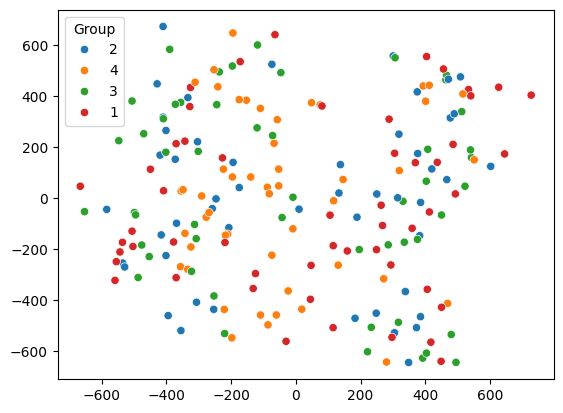

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

X = np.array(y_list)
pca = PCA(n_components=2)
components = pca.fit_transform(X)

sns.scatterplot(x=components[:, 0], y=components[:, 1], hue = df.Group)
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [ ]:
from sklearn.manifold import TSNE
X = np.array(y_list)
model = TSNE(n_components=3, perplexity=3, random_state=0)
reduced_data = model.fit_transform(X)

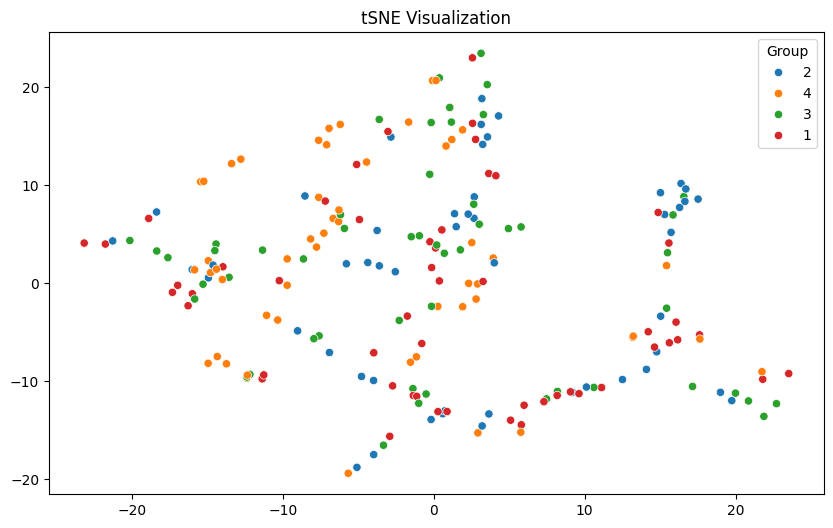

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue = df.Group)
plt.title('tSNE Visualization')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
import random

random.seed(42)
np.random.seed(42)


from sklearn.model_selection import train_test_split

In [ ]:
z_array = np.squeeze(np.array(z_list), axis=1)

In [ ]:
import random

random.seed(42)
np.random.seed(42)


from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(z_array, df.Target, test_size=0.2, stratify= df['Group'], random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2, 243]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Your code here

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"Mean absolute error RF: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error RF: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error RF: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error RF: 81.331
Mean squared error RF: 9557.891
Root mean squared error RF: 97.764
R2 score: 0.105


In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class.fit(x_train, y_train)
y_pred = xg_class.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error XG: 99.978
Mean squared error XG: 14964.830
Root mean squared error XG: 122.331
R2 score: -0.401


In [ ]:
df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Actual   Predicted
29   -246.2 -216.947128
150  -199.6 -261.995361
104   -57.1 -182.775330
176  -328.3 -279.980835
38   -262.1 -202.295227
151  -225.0 -165.740402
147  -331.6 -158.872040
23   -170.9  -58.492050
166  -118.4 -176.810654
102  -342.2 -237.454422
165  -298.8 -184.558090
51   -250.3 -176.152161
119   -94.4 -283.128479
30   -339.8 -267.539612
90   -249.0 -218.856964
11   -317.5 -267.146118
118  -346.3 -212.862564
211   -32.8 -139.726822
173  -317.2  -50.597488
57   -305.1 -182.992569
184  -264.6 -263.819336
205  -340.6 -284.467285
135  -294.9 -234.718185
34   -265.9 -293.445557
60   -278.2 -233.349289
126   -63.9 -206.743179
77    -32.9 -315.691162
107  -259.7 -247.400040
84   -324.2 -252.328156
204   -28.8 -228.382858
142  -177.7 -268.712219
42   -271.2 -260.608582
15   -255.1 -190.964539
181  -112.5 -256.946045
212  -322.9 -207.563858
94   -318.5 -272.640625
61   -326.6  -49.349030
106  -247.2 -254.562469
35    -63.6 -265.683655
140  -294.1 -250.210464
24   -348.1 -218.007401
214   -90.9   95.716675
19    -61.5 -169.017166
41   -291.7 -209.669205

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

smiles = df_1N.SMILES.to_list()
inputs = tokenizer(smiles, padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
molformer = outputs.pooler_output.numpy()
molformer.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

configuration_molformer.py:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- configuration_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molformer.py:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- modeling_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/187M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenization_molformer_fast.py:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

tokenization_molformer.py:   0%|          | 0.00/9.48k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer_fast.py
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

(243, 768)

In [ ]:
molformer

array([[ 0.43681675,  0.2936999 ,  0.29444537, ...,  0.3944785 ,
        -0.2834176 , -0.3940559 ],
       [ 0.067365  ,  0.14579505, -0.31398708, ..., -0.20046736,
        -0.25131315, -0.3298123 ],
       [ 0.87534666,  0.00541365,  0.9971353 , ...,  1.1829096 ,
        -0.6313296 , -0.31846523],
       ...,
       [ 0.94310737, -0.12160998,  0.08763112, ...,  0.67415273,
        -1.0389172 , -0.35749167],
       [ 0.7262668 ,  0.14203401,  0.32730347, ...,  0.41340342,
        -0.76723725, -0.7927351 ],
       [ 2.1519713 , -0.6866256 , -1.387687  , ..., -0.12062687,
        -0.8322331 , -0.9442856 ]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df.Target, test_size=0.2, stratify= df['Group'], random_state=42)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Actual  Predicted
29   -246.2 -157.60500
150  -199.6 -188.34150
104   -57.1 -166.73050
176  -328.3 -290.84525
38   -262.1 -209.56500
151  -225.0 -180.10800
147  -331.6 -201.00600
23   -170.9 -156.35700
166  -118.4 -209.78300
102  -342.2 -277.62225
165  -298.8 -295.11375
51   -250.3 -101.20700
119   -94.4 -143.07200
30   -339.8 -297.68600
90   -249.0 -267.63100
11   -317.5 -263.88000
118  -346.3 -208.81400
211   -32.8 -263.12350
173  -317.2 -207.16300
57   -305.1 -231.45700
184  -264.6 -205.56400
205  -340.6 -273.97725
135  -294.9 -273.29525
34   -265.9 -222.86600
60   -278.2 -257.61300
126   -63.9 -159.09100
77    -32.9 -171.13425
107  -259.7 -195.15600
84   -324.2 -298.32800
204   -28.8 -174.93500
142  -177.7 -121.02825
42   -271.2 -289.10925
15   -255.1 -263.94725
181  -112.5 -201.51900
212  -322.9 -116.04300
94   -318.5 -212.00800
61   -326.6 -190.56300
106  -247.2 -279.61400
35    -63.6 -220.14700
140  -294.1 -266.11100
24   -348.1 -293.81900
214   -90.9 -174.81200
19    -61.5 -111.24000
41   -291.7 -258.30600

In [ ]:
print(f"Mean absolute error RF: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error RF: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error RF: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error RF: 73.949
Mean squared error RF: 8276.512
Root mean squared error RF: 90.975
R2 score: 0.225


In [ ]:
x = df_again.drop(['SMILES', 'Target', 'Group'], axis = 1)
x

FP1  FP2  FP3   FP4
0    128  117  953   865
1    935  830  243   753
2    362  368  929    41
3    378  831  752   830
4    378  831  902   554
..   ...  ...  ...   ...
238  147  433   89   583
239   90  284  492  1010
240  463  691  816   849
241  128  392  652    49
242  147  981  317  -100

[243 rows x 4 columns]

In [ ]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
import xgboost
import catboost
import lightgbm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, KFold
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)

In [ ]:
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), x.columns)])

x_train, x_test, y_train, y_test = train_test_split(x, df.Target, test_size=0.2, stratify= df['Group'], random_state=42)

In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error XG: 46.684
Mean squared error XG: 7988.665
Root mean squared error XG: 89.379
R2 score: 0.303


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Actual   Predicted
170   -88.1  -85.049957
180  -330.7 -273.708801
113   -61.9  -79.197006
17   -349.4 -343.896973
159   -52.0 -143.526138
86   -286.0 -285.895264
160  -257.1 -273.708801
142  -177.7 -173.038162
8    -335.2 -273.708801
176  -328.3 -253.424133
109  -246.2 -260.619202
207  -284.9 -282.098877
206  -332.8 -323.643005
132  -340.9 -330.483582
38   -262.1 -233.901489
25   -123.2 -116.948227
168  -315.9 -253.424133
145  -345.8 -323.158813
232  -129.1  -79.197006
237  -320.8 -323.138794
202  -342.9 -323.138794
91   -262.1  105.169342
54    -66.0  -82.245193
61   -326.6 -273.708801
85   -319.1 -323.643005
96    -45.1 -100.301620
87   -102.5 -102.483047
76    -67.2  -82.245193
147  -331.6 -254.406662
131  -285.5 -323.138794
129  -269.5 -273.708801
150  -199.6 -273.708801
20   -261.2 -222.322586
12   -240.8 -273.708801
29   -246.2 -247.579453
144  -303.8 -300.332825
233  -245.2 -273.708801
101  -278.1 -272.799194
221  -339.9 -278.721741
52   -248.8 -294.970947
225  -250.0 -260.721741
179  -315.2 -323.138794
22   -338.0 -161.401123
0    -292.6 -260.721741
191    99.1 -273.708801
35    -63.6  -79.197006
82   -317.0 -340.903931
81   -328.6 -323.138794
74   -147.6 -307.560669

In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Learning rate set to 0.031597
0:	learn: 117.4891814	total: 2.52ms	remaining: 2.51s
1:	learn: 116.3323435	total: 4.88ms	remaining: 2.44s
2:	learn: 115.0432206	total: 7.45ms	remaining: 2.47s
3:	learn: 113.8755090	total: 11.2ms	remaining: 2.78s
4:	learn: 112.7600616	total: 13.8ms	remaining: 2.75s
5:	learn: 111.5754644	total: 16.1ms	remaining: 2.67s
6:	learn: 110.4146186	total: 21.4ms	remaining: 3.04s
7:	learn: 109.2931523	total: 24.2ms	remaining: 3s
8:	learn: 108.5300814	total: 26.7ms	remaining: 2.94s
9:	learn: 107.6953512	total: 27.7ms	remaining: 2.74s
10:	learn: 106.8918533	total: 30.2ms	remaining: 2.71s
11:	learn: 106.1465512	total: 32.6ms	remaining: 2.68s
12:	learn: 105.1936533	total: 41.2ms	remaining: 3.13s
13:	learn: 104.4557266	total: 43.6ms	remaining: 3.07s
14:	learn: 103.6358317	total: 45.9ms	remaining: 3.01s
15:	learn: 103.3975519	total: 48.2ms	remaining: 2.96s
16:	learn: 102.4941319	total: 50.4ms	remaining: 2.91s
17:	learn: 101.5284688	total: 52.6ms	remaining: 2.87s
18:	learn: 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Actual   Predicted
170   -88.1 -101.570793
180  -330.7 -294.607310
113   -61.9  -96.032583
17   -349.4 -348.020750
159   -52.0 -101.601731
86   -286.0 -248.906164
160  -257.1 -273.966588
142  -177.7 -113.459742
8    -335.2 -294.102205
176  -328.3 -328.342415
109  -246.2 -220.084118
207  -284.9 -330.358410
206  -332.8 -257.337042
132  -340.9 -241.895586
38   -262.1 -253.083415
25   -123.2 -103.758670
168  -315.9 -311.287353
145  -345.8 -299.573317
232  -129.1 -112.527662
237  -320.8 -279.755686
202  -342.9 -325.079765
91   -262.1 -171.625720
54    -66.0  -75.717058
61   -326.6 -286.915823
85   -319.1 -248.941278
96    -45.1  -79.393939
87   -102.5 -183.810016
76    -67.2  -96.483006
147  -331.6 -221.299500
131  -285.5 -206.898558
129  -269.5 -306.245380
150  -199.6 -289.286446
20   -261.2 -238.123885
12   -240.8 -222.381722
29   -246.2 -240.772721
144  -303.8 -304.884405
233  -245.2 -266.513654
101  -278.1 -224.334861
221  -339.9 -171.605765
52   -248.8 -288.886560
225  -250.0 -270.848722
179  -315.2 -285.647426
22   -338.0 -139.242820
0    -292.6 -257.537173
191    99.1 -265.983049
35    -63.6  -80.955111
82   -317.0 -317.874921
81   -328.6 -315.959272
74   -147.6 -308.798211

In [ ]:
df_analysis.index

Index([ 29, 150, 104, 176,  38, 151, 147,  23, 166, 102, 165,  51, 119,  30,
        90,  11, 118, 211, 173,  57, 184, 205, 135,  34,  60, 126,  77, 107,
        84, 204, 142,  42,  15, 181, 212,  94,  61, 106,  35, 140,  24, 214,
        19,  41],
      dtype='int64')

Text(0, 0.5, 'y_pred')

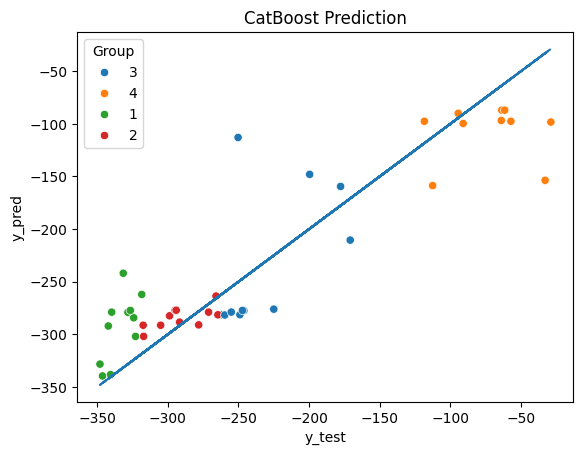

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred, hue = df.Group[df_analysis.index])
plt.plot(y_test, y_test, ls ='dashed')
plt.title('CatBoost Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import RandomSampler

In [ ]:
def objective(trial):
    # boundaries for the optimizer's
    depth = trial.suggest_int("depth", 1, 9, step=1)
    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 1, 14, step=2)
    l2_leaf_reg = trial.suggest_categorical("l2_leaf_reg", [2, 5, 7, 9, 11])
    random_strength = trial.suggest_float("random_strength", 0, 4)
    iterations = trial.suggest_int("iterations", 100, 3000, step=100)
    learning_rate = trial.suggest_float("learning_rate", 0, 1)

    model = catboost.CatBoostRegressor(depth = depth, iterations = iterations,
        learning_rate = learning_rate,
        l2_leaf_reg = l2_leaf_reg,
        min_data_in_leaf = min_data_in_leaf,
        random_strength = random_strength,
        random_state=42,
        verbose=0
    )

    cat_class_pipeline = make_pipeline(preprocessor, model)
    cat_class_pipeline.fit(x_train, y_train)
    y_pred = cat_class_pipeline.predict(x_test)
    score = mse(y_test, y_pred)
    return score

# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=RandomSampler(42)
)

study.optimize(
    objective, n_trials=20
)

[I 2024-06-11 20:57:14,436] A new study created in memory with name: Optimizer
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 14] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 13].

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-11 20:57:16,976] Trial 0 finished with value: 2417.5835895292944 and parameters: {'depth': 4, 'min_data_in_leaf': 13, 'l2_leaf_reg': 2, 'random_strength': 3.4647045830997407, 'iterations': 1900, 'learning_rate': 0.7080725777960455}. Best is trial 0 with value: 2417.5835895292944.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 14] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
study.best_params

{'depth': 3,
 'min_data_in_leaf': 3,
 'l2_leaf_reg': 2,
 'random_strength': 0.7462802355441434,
 'iterations': 2700,
 'learning_rate': 0.5393422419156507}

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
cat_class = catboost.CatBoostRegressor(**study.best_params)
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

0:	learn: 111.4912002	total: 699us	remaining: 1.89s
1:	learn: 107.0602660	total: 2.25ms	remaining: 3.04s
2:	learn: 103.4485226	total: 3.85ms	remaining: 3.46s
3:	learn: 97.2382329	total: 4.47ms	remaining: 3.01s
4:	learn: 94.8716292	total: 5.02ms	remaining: 2.71s
5:	learn: 92.5648667	total: 5.63ms	remaining: 2.53s
6:	learn: 90.4771088	total: 6.27ms	remaining: 2.41s
7:	learn: 82.9749842	total: 6.81ms	remaining: 2.29s
8:	learn: 79.1967906	total: 7.35ms	remaining: 2.2s
9:	learn: 76.4360529	total: 7.87ms	remaining: 2.12s
10:	learn: 74.2676396	total: 8.39ms	remaining: 2.05s
11:	learn: 70.4071862	total: 8.99ms	remaining: 2.01s
12:	learn: 68.6817549	total: 9.56ms	remaining: 1.98s
13:	learn: 66.7960736	total: 10.2ms	remaining: 1.95s
14:	learn: 65.5440414	total: 10.7ms	remaining: 1.91s
15:	learn: 64.2530694	total: 11.2ms	remaining: 1.87s
16:	learn: 63.2555785	total: 11.7ms	remaining: 1.84s
17:	learn: 61.4446014	total: 12.2ms	remaining: 1.81s
18:	learn: 60.7060831	total: 12.7ms	remaining: 1.79s
19

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros



Actual   Predicted
29   -246.2 -258.628482
150  -199.6  -10.871922
104   -57.1  -84.998362
176  -328.3 -311.843493
38   -262.1 -242.164001
151  -225.0 -247.896237
147  -331.6 -252.798898
23   -170.9 -169.100996
166  -118.4  -84.998362
102  -342.2 -294.748908
165  -298.8 -272.533288
51   -250.3 -134.598925
119   -94.4  -73.728141
30   -339.8 -252.313539
90   -249.0 -279.527937
11   -317.5 -294.748908
118  -346.3 -381.098944
211   -32.8  -62.736113
173  -317.2 -314.245698
57   -305.1 -316.324144
184  -264.6 -279.701869
205  -340.6 -390.753238
135  -294.9 -275.950109
34   -265.9 -223.143220
60   -278.2 -280.843567
126   -63.9  -78.526596
77    -32.9  -62.723763
107  -259.7 -277.553845
84   -324.2 -325.699013
204   -28.8  -88.759834
142  -177.7 -150.850012
42   -271.2 -252.313539
15   -255.1 -253.927992
181  -112.5 -149.361057
212  -322.9 -314.245698
94   -318.5 -309.514658
61   -326.6 -279.670381
106  -247.2 -279.670381
35    -63.6  -73.099310
140  -294.1 -275.950109
24   -348.1 -346.750428
214   -90.9  -88.259458
19    -61.5  -73.099310
41   -291.7 -308.096688

In [ ]:
df_global = pd.concat([pd.DataFrame(data=z_array), df], axis = 1)

In [ ]:
df_global

0         1         2         3         4         5         6  \
0   -0.119175  1.027455  0.228159 -0.874814 -0.922036 -1.316313  2.457503   
1   -0.653647 -0.565305 -0.937126  0.866359 -0.889040  0.947017 -1.363100   
2   -0.058433 -0.647496 -0.207258  1.122947 -0.811075 -1.240505 -0.204479   
3   -0.686837  0.030102  1.270790  0.780745 -1.341204 -1.097628 -0.263214   
4    0.809854 -0.562073 -0.730510  1.832069 -1.996776 -0.346227 -0.628771   
..        ...       ...       ...       ...       ...       ...       ...   
214  0.899452 -0.343228  0.862785  1.006940 -0.352804 -1.706975  0.085536   
215 -0.250659 -0.697142  0.037500 -0.538273  0.235882  0.383905 -1.616981   
216 -1.177798 -0.816759 -1.605660  0.415839 -1.236760 -0.031347 -1.511678   
217  0.078965 -1.322636 -0.429262 -1.136364 -0.404290  0.392721 -1.941876   
218 -0.977325 -0.912561  1.664237 -0.309136 -1.241326  0.875127  0.614117   

            7         8         9  ...       253       254       255  FP1  \
0    0.947179 -0.680912 -0.769397  ... -1.065592  0.838788  2.441522  128   
1    1.044699 -1.627319 -0.967655  ...  0.016207 -1.712874  1.469198  935   
2    0.821289  0.501451 -0.332825  ... -1.519806 -0.939103  0.108636  362   
3    1.572080 -0.717777 -1.513404  ... -0.261716 -0.859543  1.295711  378   
4    1.400798  0.205286 -1.509803  ... -0.733706  0.005475  0.330135  378   
..        ...       ...       ...  ...       ...       ...       ...  ...   
214  0.783486  0.278616  0.205960  ... -0.026365 -0.007846  1.049963  378   
215 -0.416782  3.316860 -0.421554  ... -0.207811  0.731587 -0.400583  881   
216 -0.820788 -0.880878  0.278607  ...  0.786599  1.325135 -0.176750  935   
217 -0.171547 -0.561298 -0.636326  ... -1.867448 -0.911812 -0.140627  881   
218 -1.368998 -0.450992 -0.307488  ...  0.018123 -0.577891  1.438330  378   

     FP2  FP3  FP4                                             SMILES  Target  \
0    117  953  865  C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...  -292.6   
1    830  243  753                            C[C@H]1CC[C@H]2CCCCN2C1   -53.2   
2    368  929   41                                CC1=[NH+]C(=CC=C1)C  -177.0   
3    831  752  830                                    CC1=NC(=CC=C1)C   -69.1   
4    831  902  554                               CC1=NC2=CC=CC=C2C=C1   -73.1   
..   ...  ...  ...                                                ...     ...   
214  738   98   34                     COC(=O)C1=CN=C(SC1)C2=CC=CC=C2   -90.9   
215   34  667  905                                  CN(C)/C=C/C=C/C=O  -295.4   
216  407  276  891                                 CC1CCCC=C1N2CCCCC2  -311.9   
217  865  214  181                                        CCN(CCO)C=O  -254.3   
218  428  915  563  C1=CC=C(C=C1)[Sn](C2=CC=CC=C2)(C3=CC=CC=C3)OC4...  -120.2   

     Group  
0        2  
1        4  
2        3  
3        4  
4        4  
..     ...  
214      4  
215      2  
216      2  
217      3  
218      4  

[219 rows x 263 columns]

In [ ]:
df_global.columns = df_global.columns.astype("str")
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), x.columns),
                                  ("scaler", StandardScaler(), df_global.drop(["FP1", "FP2", "FP3", "FP4", 'SMILES', 'Target', 'Group'], axis = 1).columns)])

x_train, x_test, y_train, y_test = train_test_split(df_global.drop(['SMILES', 'Target', 'Group'], axis = 1), df.Target, test_size=0.2, stratify= df_global['Group'], random_state=42)

In [ ]:
df_global.drop(["FP1", "FP2", "FP3", "FP4", 'SMILES', 'Target', 'Group'], axis = 1).columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '246', '247', '248', '249', '250', '251', '252', '253', '254', '255'],
      dtype='object', length=256)

In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error XG: 63.531
Mean squared error XG: 6307.438
Root mean squared error XG: 79.419
R2 score: 0.410


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros



In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Learning rate set to 0.031087
0:	learn: 122.7658435	total: 58.6ms	remaining: 58.6s
1:	learn: 122.1480515	total: 99.8ms	remaining: 49.8s
2:	learn: 121.2117459	total: 142ms	remaining: 47.2s
3:	learn: 120.7507250	total: 184ms	remaining: 45.7s
4:	learn: 119.6788035	total: 229ms	remaining: 45.7s
5:	learn: 118.5601339	total: 273ms	remaining: 45.2s
6:	learn: 117.4441585	total: 317ms	remaining: 44.9s
7:	learn: 116.3444494	total: 360ms	remaining: 44.7s
8:	learn: 115.3650555	total: 402ms	remaining: 44.3s
9:	learn: 114.7833937	total: 447ms	remaining: 44.3s
10:	learn: 114.5538753	total: 488ms	remaining: 43.9s
11:	learn: 113.9567560	total: 529ms	remaining: 43.5s
12:	learn: 113.1650630	total: 572ms	remaining: 43.5s
13:	learn: 112.5305054	total: 614ms	remaining: 43.3s
14:	learn: 111.7917570	total: 659ms	remaining: 43.3s
15:	learn: 111.2403239	total: 703ms	remaining: 43.2s
16:	learn: 110.7476732	total: 748ms	remaining: 43.2s
17:	learn: 110.0256313	total: 796ms	remaining: 43.4s
18:	learn: 109.3123492	t

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros



Actual   Predicted
29   -246.2 -235.379398
150  -199.6 -299.830705
104   -57.1 -127.927314
176  -328.3 -266.716260
38   -262.1 -246.030350
151  -225.0 -239.988114
147  -331.6 -225.528010
23   -170.9 -233.514121
166  -118.4 -131.855244
102  -342.2 -244.207852
165  -298.8 -244.170015
51   -250.3 -223.980408
119   -94.4 -136.987038
30   -339.8 -242.067101
90   -249.0 -225.682442
11   -317.5 -245.746677
118  -346.3 -238.499091
211   -32.8 -216.563490
173  -317.2 -219.377523
57   -305.1 -257.812334
184  -264.6 -276.836807
205  -340.6 -259.922857
135  -294.9 -297.939758
34   -265.9 -225.046902
60   -278.2 -249.002718
126   -63.9 -124.716236
77    -32.9 -260.129135
107  -259.7 -259.512185
84   -324.2 -255.129848
204   -28.8 -138.911657
142  -177.7 -237.956265
42   -271.2 -259.988404
15   -255.1 -233.858602
181  -112.5 -220.786600
212  -322.9 -190.208191
94   -318.5 -244.900057
61   -326.6 -236.125073
106  -247.2 -249.350830
35    -63.6 -140.639263
140  -294.1 -259.578622
24   -348.1 -231.291471
214   -90.9 -121.625144
19    -61.5 -130.495961
41   -291.7 -254.132413

In [ ]:
df_global = pd.concat([pd.DataFrame(data=molformer), df], axis = 1)
df_global

0         1         2         3         4         5         6  \
0    0.436817  0.293700  0.294445  0.319626 -0.836934 -0.082575 -0.810116   
1    0.067365  0.145795 -0.313987  0.152012 -0.423240 -0.259650 -0.426972   
2    0.875347  0.005414  0.997135  0.514410 -0.307871  0.555359 -1.122210   
3    0.524032  0.220443  0.495253  0.371818 -0.332126  0.548389 -1.036384   
4    0.818794  0.446405  0.475615  0.015215 -0.826308  0.475848 -0.658627   
..        ...       ...       ...       ...       ...       ...       ...   
214  0.606230  0.228746  0.545170  0.150916 -0.779895 -0.277664 -0.761843   
215  0.867137 -0.167470  0.675412 -0.347347 -0.947666 -0.435840 -0.573265   
216  0.776031  0.133765  0.162429  0.454699 -1.020866 -0.030070 -0.162511   
217  0.503465 -0.402458 -0.068333 -0.240085 -1.399428 -0.110332 -0.279141   
218  1.330395 -0.146764  0.398674 -0.109476 -0.504905 -0.006571 -0.326849   

            7         8         9  ...       765       766       767  FP1  \
0    0.427867  0.044020 -0.418058  ...  0.394478 -0.283418 -0.394056  128   
1    0.738392  0.969691  0.427766  ... -0.200467 -0.251313 -0.329812  935   
2   -0.332308 -0.385878 -0.100238  ...  1.182910 -0.631330 -0.318465  362   
3    0.003768 -0.585690 -0.672952  ...  0.691054 -0.093119 -0.189518  378   
4   -0.210691 -0.401705 -0.249416  ...  1.339818 -0.306618 -0.641542  378   
..        ...       ...       ...  ...       ...       ...       ...  ...   
214  0.015125 -0.719743 -0.137476  ...  0.569140 -0.539486 -0.850456  378   
215  0.088794  0.231993 -0.289183  ...  0.739202 -0.523237 -0.477993  881   
216  0.546627 -0.365842  0.014026  ...  0.973187 -0.534305 -0.339982  935   
217 -0.630779  0.271329  0.536066  ... -0.111283 -0.121205  0.077140  881   
218  0.327538 -0.619155 -0.336590  ...  0.823602 -0.497551 -0.820744  378   

     FP2  FP3  FP4                                             SMILES  Target  \
0    117  953  865  C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...  -292.6   
1    830  243  753                            C[C@H]1CC[C@H]2CCCCN2C1   -53.2   
2    368  929   41                                CC1=[NH+]C(=CC=C1)C  -177.0   
3    831  752  830                                    CC1=NC(=CC=C1)C   -69.1   
4    831  902  554                               CC1=NC2=CC=CC=C2C=C1   -73.1   
..   ...  ...  ...                                                ...     ...   
214  738   98   34                     COC(=O)C1=CN=C(SC1)C2=CC=CC=C2   -90.9   
215   34  667  905                                  CN(C)/C=C/C=C/C=O  -295.4   
216  407  276  891                                 CC1CCCC=C1N2CCCCC2  -311.9   
217  865  214  181                                        CCN(CCO)C=O  -254.3   
218  428  915  563  C1=CC=C(C=C1)[Sn](C2=CC=CC=C2)(C3=CC=CC=C3)OC4...  -120.2   

     Group  
0        2  
1        4  
2        3  
3        4  
4        4  
..     ...  
214      4  
215      2  
216      2  
217      3  
218      4  

[219 rows x 775 columns]

In [ ]:
df_global.columns = df_global.columns.astype("str")
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), x.columns),
                                  ("scaler", StandardScaler(), df_global.drop(["FP1", "FP2", "FP3", "FP4", 'SMILES', 'Target', 'Group'], axis = 1).columns)])

x_train, x_test, y_train, y_test = train_test_split(df_global.drop(['SMILES', 'Target', 'Group'], axis = 1), df.Target, test_size=0.2, stratify= df_global['Group'], random_state=42)

In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'gblinear')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error XG: 61.719
Mean squared error XG: 6697.256
Root mean squared error XG: 81.837
R2 score: 0.373


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros



In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Learning rate set to 0.031087
0:	learn: 122.7744598	total: 319ms	remaining: 5m 19s
1:	learn: 121.5021568	total: 556ms	remaining: 4m 37s
2:	learn: 120.6254168	total: 784ms	remaining: 4m 20s
3:	learn: 119.4935891	total: 1.01s	remaining: 4m 12s
4:	learn: 119.1026514	total: 1.22s	remaining: 4m 3s
5:	learn: 118.1834766	total: 1.44s	remaining: 3m 58s
6:	learn: 117.0878623	total: 1.61s	remaining: 3m 49s
7:	learn: 116.3306980	total: 1.74s	remaining: 3m 35s
8:	learn: 115.5418184	total: 1.86s	remaining: 3m 25s
9:	learn: 114.5365363	total: 1.99s	remaining: 3m 17s
10:	learn: 113.8324200	total: 2.11s	remaining: 3m 10s
11:	learn: 113.1416174	total: 2.24s	remaining: 3m 4s
12:	learn: 112.5885265	total: 2.38s	remaining: 3m
13:	learn: 111.8143765	total: 2.51s	remaining: 2m 56s
14:	learn: 110.8755410	total: 2.63s	remaining: 2m 52s
15:	learn: 109.9508252	total: 2.75s	remaining: 2m 49s
16:	learn: 109.4283601	total: 2.88s	remaining: 2m 46s
17:	learn: 108.6257832	total: 3s	remaining: 2m 43s
18:	learn: 108.44

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros



Actual   Predicted
29   -246.2 -223.785158
150  -199.6 -205.440153
104   -57.1 -167.236813
176  -328.3 -303.584315
38   -262.1 -269.949148
151  -225.0 -214.451874
147  -331.6 -239.949635
23   -170.9 -196.600970
166  -118.4 -135.488999
102  -342.2 -275.692008
165  -298.8 -296.582734
51   -250.3 -150.313379
119   -94.4  -92.291447
30   -339.8 -314.404079
90   -249.0 -264.930383
11   -317.5 -290.465573
118  -346.3 -255.625022
211   -32.8 -210.158573
173  -317.2 -236.451449
57   -305.1 -250.757988
184  -264.6 -191.882741
205  -340.6 -272.378094
135  -294.9 -286.994768
34   -265.9 -260.582982
60   -278.2 -252.917377
126   -63.9 -108.833983
77    -32.9 -177.715911
107  -259.7 -243.445889
84   -324.2 -309.883635
204   -28.8 -145.713390
142  -177.7 -143.121651
42   -271.2 -262.411707
15   -255.1 -243.991148
181  -112.5 -201.592708
212  -322.9 -207.057461
94   -318.5 -239.396809
61   -326.6 -250.515075
106  -247.2 -291.479978
35    -63.6 -141.240567
140  -294.1 -267.553487
24   -348.1 -338.653856
214   -90.9 -111.230292
19    -61.5 -108.371349
41   -291.7 -272.024738

In [ ]:
cat_class.get_feature_importance().shape

(1173,)

<BarContainer object of 1173 artists>

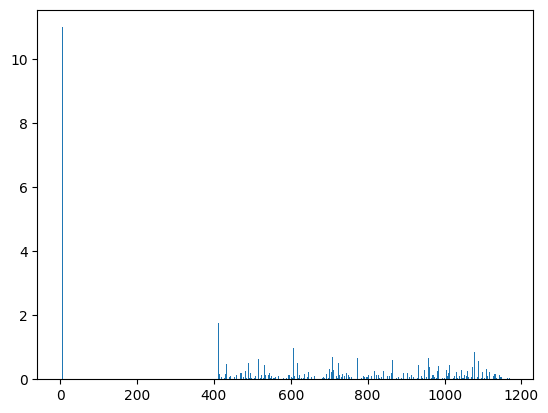

In [ ]:
plt.bar(x = list(range(1173)), height = cat_class.get_feature_importance())

In [ ]:
!pip install shap

import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(cat_class)

In [ ]:
x.columns

Index(['FP1', 'FP2', 'FP3', 'FP4'], dtype='object')

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
categorical_features_indices = np.where(df_global.drop(['SMILES', 'Target', 'Group'], axis = 1).dtypes != np.float64)[0]
categorical_features_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df_global["FP1"] = df_global["FP1"].astype(str)
df_global["FP2"] = df_global["FP2"].astype(str)
df_global["FP3"] = df_global["FP3"].astype(str)
df_global["FP4"] = df_global["FP4"].astype(str)

Text(0, 0.5, 'Component 2')

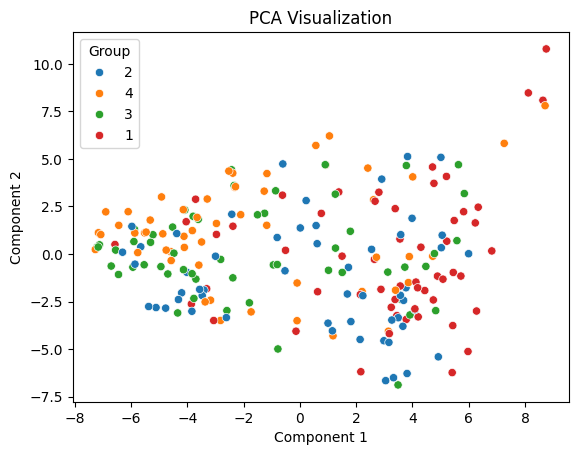

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(molformer)

sns.scatterplot(x=components[:, 0], y=components[:, 1], hue = df.Group)
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=3, perplexity=5, random_state=0)
reduced_data = model.fit_transform(molformer)

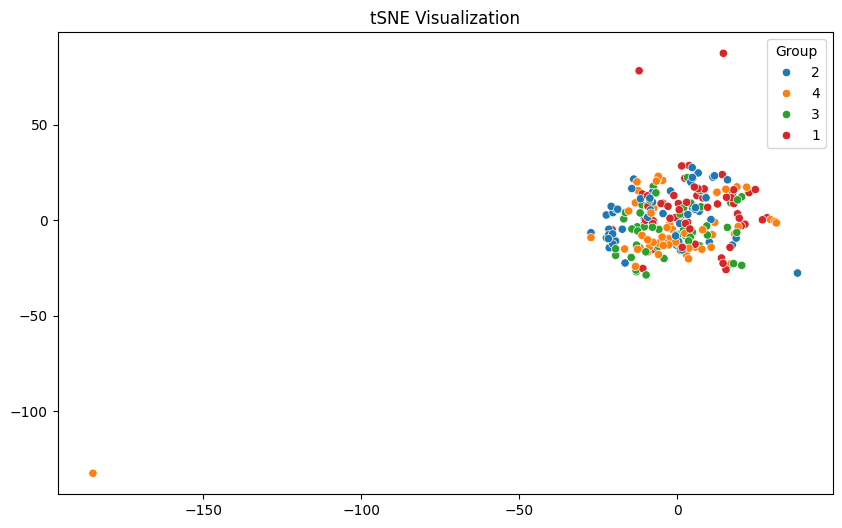

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue = df.Group)
plt.title('tSNE Visualization')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
CC(C)(C)C1=CC=CC=C1N
CC1=CC=CC=C1N

In [ ]:
import numpy as np
import pandas as pd

z_array = np.squeeze(np.array(z_list), axis=1)
df_2c_smiles = pd.DataFrame({"Butil": z_array[0], "Metil": z_array[1]})
df_2c_smiles['Diff'] = np.abs(df_2c_smiles['Butil'] - df_2c_smiles['Metil'])
df_2c_smiles

Butil     Metil      Diff
0   -0.733052 -0.223818  0.509234
1   -0.010011 -2.124929  2.114918
2   -0.551896  2.756588  3.308484
3    0.500589 -0.170137  0.670726
4    0.127731  0.654516  0.526785
..        ...       ...       ...
251  0.732646 -0.495193  1.227839
252  0.970960  0.751907  0.219054
253  0.072120 -0.341084  0.413203
254 -0.073128  1.023947  1.097075
255 -1.232909  0.860452  2.093360

[256 rows x 3 columns]

In [ ]:
df_2c_smiles.Diff.sort_values(ascending=False)[:40].index

30     4.475298
187    3.534544
98     3.512724
236    3.427810
2      3.308484
241    3.277512
123    3.220332
54     3.170591
100    3.053990
26     2.903564
222    2.874803
19     2.870316
134    2.799866
238    2.672480
214    2.650189
131    2.620317
138    2.599518
188    2.591345
203    2.538960
81     2.531981
201    2.470468
99     2.433069
163    2.397054
208    2.366701
219    2.321579
216    2.260453
15     2.229311
63     2.188177
107    2.185560
182    2.179516
197    2.179047
11     2.173884
57     2.162406
43     2.135836
171    2.133397
1      2.114918
56     2.108855
255    2.093360
246    2.087063
31     2.083420
Name: Diff, dtype: float32

In [ ]:
import pickle
with open("z_list", "rb")as f:
  z_list_1 = pickle.load(f)

In [ ]:
z_array = np.squeeze(np.array(z_list_1), axis=1)
df_2d_smiles = pd.DataFrame({"1": z_array[0], "P": z_array[1]})
df_2d_smiles['Diff'] = np.abs(df_2d_smiles['1'] - df_2d_smiles['P'])
df_2d_smiles

1         P      Diff
0    1.595951  0.233571  1.362379
1   -1.306075 -0.067232  1.238843
2    0.275608 -0.426689  0.702297
3    0.682760  0.999327  0.316567
4   -1.062761  0.976422  2.039183
..        ...       ...       ...
251 -0.365299  0.185456  0.550755
252  0.500255 -0.241312  0.741567
253  0.529708  0.791471  0.261763
254  0.042530  0.016085  0.026445
255  1.929841  0.862860  1.066981

[256 rows x 3 columns]

In [ ]:
with open("z_list", "rb")as f:
  z_list_2 = pickle.load(f)

z_array = np.squeeze(np.array(z_list_2), axis=1)
df_2e_smiles = pd.DataFrame({"S": z_array[0], "Br": z_array[1]})
df_2e_smiles['Diff'] = np.abs(df_2e_smiles['S'] - df_2e_smiles['Br'])
df_2e_smiles

S        Br      Diff
0   -0.841494  0.312164  1.153658
1    0.205340  0.700977  0.495637
2   -0.681525  1.705113  2.386637
3    1.205964 -0.323223  1.529187
4   -0.375628 -2.517455  2.141827
..        ...       ...       ...
251 -0.952555 -0.387646  0.564909
252 -0.013951  0.508438  0.522388
253  0.257176 -0.307177  0.564353
254 -0.122405 -0.040380  0.082025
255 -0.161297  0.811493  0.972790

[256 rows x 3 columns]

In [ ]:
df_2e_smiles.Diff.sort_values(ascending=False)[:40]

222    4.256560
164    3.527507
85     2.991924
135    2.927155
196    2.883613
24     2.803043
40     2.751808
248    2.648478
52     2.644942
59     2.590615
208    2.540546
2      2.386637
53     2.344983
36     2.313872
44     2.303536
167    2.291459
214    2.280632
223    2.258446
193    2.249828
204    2.146872
4      2.141827
168    2.127455
55     2.120652
32     2.107449
35     2.027456
109    1.956429
245    1.916648
187    1.912204
227    1.910253
141    1.890051
110    1.870472
100    1.865883
75     1.855839
181    1.832802
216    1.832185
56     1.826503
188    1.736484
169    1.717576
63     1.708797
175    1.665251
Name: Diff, dtype: float32

In [ ]:
intersect = np.intersect1d(df_2c_smiles.Diff.sort_values(ascending=False)[:40].index, df_2d_smiles.Diff.sort_values(ascending=False)[:40].index)
intersect = np.intersect1d(intersect, df_2e_smiles.Diff.sort_values(ascending=False)[:40].index)
intersect

array([63])

In [ ]:
df_2c_smiles.Diff[63], df_2e_smiles.Diff[63], df_2d_smiles.Diff[63]

(2.188177, 1.7087969, 3.1264153)

<Axes: xlabel='None', ylabel='Diff'>

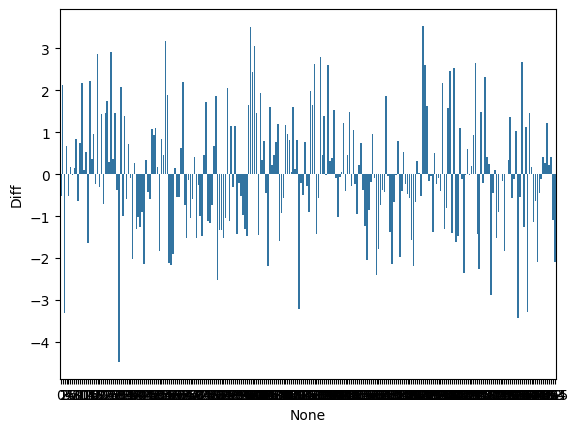

In [ ]:
import seaborn as sns

sns.barplot(df_2_smiles, x = df_2_smiles.index, y = 'Diff')

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

smiles = ['CC(C)(C)C1=CC=CC=C1N', 'CC1=CC=CC=C1N', 'CC(C)C1=CC=CC=C1N']
inputs = tokenizer(smiles, padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
molformer = outputs.pooler_output.numpy()


df_2_smiles = pd.DataFrame({"Butil": molformer[0], "Metil": molformer[1], "Isopropyl": molformer[2]})
df_2_smiles['Diff'] = np.abs(df_2_smiles['Butil'] - df_2_smiles['Metil']) + np.abs(df_2_smiles['Butil'] - df_2_smiles['Isopropyl']) + np.abs(df_2_smiles['Metil']- df_2_smiles['Isopropyl'])
df_2_smiles

Butil     Metil  Isopropyl      Diff
0    0.327828  0.943165   0.493746  1.230674
1    0.199299  0.162592   0.098721  0.201156
2    0.542536  0.127301   0.412440  0.830470
3   -0.196598  0.179517  -0.155812  0.752231
4   -0.314713 -0.373254  -0.595075  0.560724
..        ...       ...        ...       ...
763 -0.117219 -0.330401  -0.320969  0.426366
764 -2.751216 -3.142768  -2.726022  0.833492
765  0.622256  1.201814   0.600982  1.201665
766 -0.148317 -0.596153  -0.236673  0.895673
767 -0.509997 -1.059538  -0.824379  1.099083

[768 rows x 4 columns]

In [ ]:
df_2_smiles.Diff.sort_values(ascending=False)[:40]

339    3.075485
757    2.469331
551    2.458793
230    2.318071
629    2.239409
433    2.193503
215    2.103765
717    2.092972
487    2.064623
8      1.967784
573    1.956517
514    1.950762
203    1.946223
715    1.936774
289    1.877876
746    1.875517
228    1.862586
415    1.853784
123    1.837093
718    1.828934
Name: Diff, dtype: float32

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

smiles = ['C1CCCC(CCC1)N2CCCC2', 'COP(=O)(NC1=CC=CC=C1)OC']
inputs = tokenizer(smiles, padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
molformer = outputs.pooler_output.numpy()


df_2a_smiles = pd.DataFrame({"1": molformer[0], "P": molformer[1]})
df_2a_smiles['Diff'] = np.abs(df_2a_smiles['1'] - df_2a_smiles['P'])
df_2a_smiles

1         P      Diff
0    0.368744  0.471326  0.102582
1    0.385715  0.171885  0.213831
2    0.132075  0.316235  0.184160
3    0.402171  0.053733  0.348438
4   -1.069278 -0.435356  0.633922
..        ...       ...       ...
763 -0.297349 -0.060036  0.237313
764 -3.297828 -2.415004  0.882824
765  0.355040  0.503413  0.148373
766 -0.130933 -0.882732  0.751799
767 -0.256141 -0.399651  0.143511

[768 rows x 3 columns]

In [ ]:
df_2a_smiles.Diff.sort_values(ascending=False)[:100].index

Index([339, 279, 551, 177, 345, 372, 118, 226, 751, 375,  50, 223,  49, 675,
       169, 149, 138, 617, 615,  75, 592, 203, 237, 377,  92, 713, 680,   8,
       661, 260,  73, 434, 192,  67, 276, 742, 117, 632, 465, 583],
      dtype='int64')

In [ ]:
intersect = np.intersect1d(np.array(df_2a_smiles.Diff.sort_values(ascending=False)[:100].index), np.array(df_2_smiles.Diff.sort_values(ascending=False)[:100].index))

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

smiles = ['CN(C)S(=O)(=O)C', 'C1=CC=NC(=C1)Br']
inputs = tokenizer(smiles, padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
molformer = outputs.pooler_output.numpy()


df_2b_smiles = pd.DataFrame({"S": molformer[0], "Br": molformer[1]})
df_2b_smiles['Diff'] = np.abs(df_2b_smiles['S'] - df_2b_smiles['Br'])
df_2b_smiles

S        Br      Diff
0    0.296717  0.791901  0.495184
1    0.819816  0.437490  0.382326
2   -0.394482  0.150686  0.545168
3   -0.095284  0.448481  0.543765
4   -0.672834 -0.702576  0.029742
..        ...       ...       ...
763 -0.099452 -0.192022  0.092570
764 -1.979178 -2.217457  0.238278
765 -0.949777  0.861777  1.811555
766 -0.593207 -0.058908  0.534299
767 -0.016657 -0.340848  0.324190

[768 rows x 3 columns]

In [ ]:
np.intersect1d(df_2b_smiles.Diff.sort_values(ascending=False)[:100].index, intersect)

array([339, 675])

In [ ]:
print(df_2_smiles.Diff[339], df_2a_smiles.Diff[339], df_2b_smiles.Diff[339])

3.0754852 2.9677577 3.505549


In [ ]:
print(df_2_smiles.Diff[675], df_2a_smiles.Diff[675], df_2b_smiles.Diff[675])

1.3783166 1.2700558 0.90220654


<Axes: xlabel='None', ylabel='Diff'>

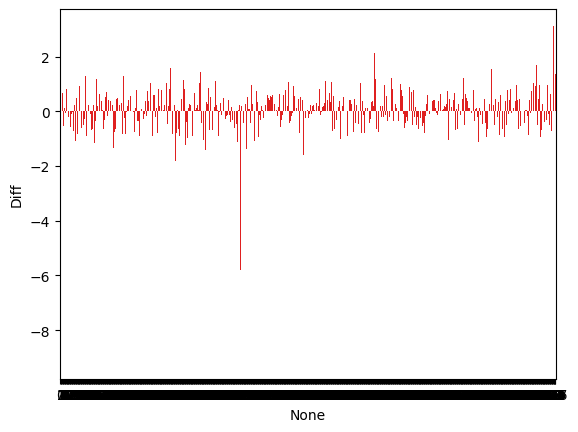

In [ ]:
sns.barplot(df_2_smiles, x = df_2_smiles.index, y = 'Diff', color = 'red')


In [ ]:
import matplotlib.pyplot as plt

width = 0.02
plt.figure(figsize=(200, 50), dpi=200)
plt.scatter(df_2_smiles.index, df_2_smiles.Metil, label = 'Metil', color = 'r')

plt.scatter(df_2_smiles.index, df_2_smiles.Butil, label = 'Butil', color='g')

plt.scatter(df_2_smiles.index, df_2_smiles.Isopropyl, label = 'Isopropyl', color = 'b')

plt.xlabel("Index")
plt.ylabel('Value')



plt.legend()
plt.show()


In [ ]:
with open("z_list", "rb")as f:
  z_list_main = pickle.load(f)

z_array = np.squeeze(np.array(z_list_main), axis=1)
target = np.array(df_1N.Target1[:219])

In [ ]:
v63 = z_array[:, 63]

In [ ]:
np.corrcoef(molformer[:219, 675], target.astype(float))[0][1]

0.0046598989728029545

In [ ]:
molformer[:219, 339].shape

(219,)

In [ ]:
molformer_corr = {}
target = df.Target
for i in range(molformer.shape[1]):
  molformer_corr[i] = np.abs(np.corrcoef(molformer[:, i], target.astype(float))[0][1])

In [ ]:
molformer_corr

{0: 0.1806168561522788,
 1: 0.049534545358559494,
 2: 0.1179590606322262,
 3: 0.08623307108120007,
 4: 0.011324758016794481,
 5: 0.10760310854085474,
 6: 0.09999957263313593,
 7: 0.005733842120983213,
 8: 0.14054418902335686,
 9: 0.08949745775553478,
 10: 0.06158356839752384,
 11: 0.18552528448846597,
 12: 0.0765849761306515,
 13: 0.07606927507235543,
 14: 0.2681384736169449,
 15: 0.04753407612262344,
 16: 0.19957361536965218,
 17: 0.06718493293075135,
 18: 0.007228311254826777,
 19: 0.17658066937180894,
 20: 0.22033977105021196,
 21: 0.1313142236816814,
 22: 0.1690595311570295,
 23: 0.05578952044507754,
 24: 0.14511993944976756,
 25: 0.28507024988504204,
 26: 0.1978070457964153,
 27: 0.1637097497768401,
 28: 0.29823541674757087,
 29: 0.1481334437557226,
 30: 0.14111881232799248,
 31: 0.1690376085867151,
 32: 0.08033504897161724,
 33: 0.08519798948111597,
 34: 0.17201087920943736,
 35: 0.11515146948797027,
 36: 0.24775096676576813,
 37: 0.16139817954997462,
 38: 0.03850143215906924,
 3

In [ ]:
npvae_corr = {}
for i in range(z_array.shape[1]):
  npvae_corr[i] = np.abs(np.corrcoef(z_array[:219, i], target.astype(float))[0][1])

In [ ]:
npvae_corr

{0: 0.01044718251316692,
 1: 0.09829146028918107,
 2: 0.10531841677815607,
 3: 0.07777256215622688,
 4: 0.20459881458474272,
 5: 0.03015678021716415,
 6: 0.18672652368080134,
 7: 0.06255018514059063,
 8: 0.02563533181089275,
 9: 0.04670152913189152,
 10: 0.03575125110406392,
 11: 0.0794741380952432,
 12: 0.07366206728058196,
 13: 0.01876388640375199,
 14: 0.07332440683510641,
 15: 0.15980531564680353,
 16: 0.04419513041144708,
 17: 0.155141225993684,
 18: 0.09172636633023706,
 19: 0.04373560429167466,
 20: 0.05724617129479074,
 21: 0.005865292456762032,
 22: 0.016243640606903396,
 23: 0.08560918449388956,
 24: 0.059089479131101436,
 25: 0.06308677069779974,
 26: 0.01632762392998731,
 27: 0.08981802230040736,
 28: 0.011188862762083846,
 29: 0.08702478938904308,
 30: 0.06346362457765359,
 31: 0.22821500798404878,
 32: 0.12584369839957463,
 33: 0.06900554810397375,
 34: 0.08751217285975367,
 35: 0.015508979490080772,
 36: 0.021557637500107592,
 37: 0.034345495231316574,
 38: 0.12805224182

In [ ]:
sorted(npvae_corr.items(), key=lambda x:x[1], reverse=True)[:30]

[(31, 0.22821500798404878),
 (156, 0.22146928210919822),
 (230, 0.21824229422389976),
 (117, 0.21499100272862487),
 (82, 0.2059774035260473),
 (4, 0.20459881458474272),
 (6, 0.18672652368080134),
 (140, 0.1825746744480098),
 (72, 0.17467657000603296),
 (207, 0.17362180881450526),
 (186, 0.17216868803081747),
 (217, 0.16469671685080375),
 (45, 0.16402238893319232),
 (171, 0.1638984731453532),
 (121, 0.16363241171100557),
 (15, 0.15980531564680353),
 (226, 0.1558181413459188),
 (17, 0.155141225993684),
 (238, 0.1541403173033475),
 (96, 0.1508058909712408),
 (189, 0.1505475120645586),
 (195, 0.14926506893765598),
 (91, 0.14625618489915412),
 (97, 0.14264077999333358),
 (145, 0.13388672245045666),
 (78, 0.12989659882926197),
 (38, 0.12805224182535868),
 (32, 0.12584369839957463),
 (200, 0.12526122459317415),
 (118, 0.12435461074021788)]

In [ ]:
sorted(molformer_corr.items(), key=lambda x:x[1], reverse=True)[:30]

[(292, 0.39969222820146644),
 (165, 0.34243053976265486),
 (725, 0.31966342629870403),
 (312, 0.31667872525622254),
 (541, 0.3126961059007251),
 (562, 0.309401062105265),
 (319, 0.30725117491723186),
 (202, 0.3024372837634136),
 (28, 0.29823541674757087),
 (92, 0.2973584049972333),
 (597, 0.2965462661369678),
 (289, 0.29562397276318586),
 (238, 0.2935371403830341),
 (187, 0.2933188888770197),
 (241, 0.288646503187844),
 (736, 0.2881513546955816),
 (237, 0.2874886882129764),
 (411, 0.2871464309413503),
 (654, 0.28615811756976184),
 (588, 0.28565800635131705),
 (325, 0.2856563178786247),
 (25, 0.28507024988504204),
 (138, 0.27923336766838974),
 (301, 0.2787952990425811),
 (287, 0.2770582274918675),
 (304, 0.27368615202804386),
 (547, 0.27263026485090164),
 (479, 0.2689396967806534),
 (14, 0.2681384736169449),
 (689, 0.26746850884844)]

In [ ]:
index_molformer_list = []
for key, value in molformer_corr.items():
  if value > 0.3:
    index_molformer_list.append(key)
index_molformer_list

[165, 202, 292, 312, 319, 541, 562, 725]

Text(0.5, 1.0, 'Correlation MolFormer features and target')

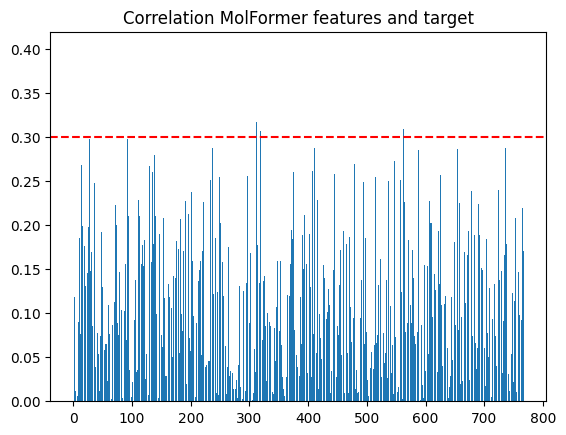

In [ ]:
import matplotlib.pyplot as plt

plt.bar(molformer_corr.keys(), molformer_corr.values())
plt.axhline(y=0.3, color='r', linestyle='--')
plt.title('Correlation MolFormer features and target')

In [ ]:
for i in index_molformer_list:
  df[f'f_{i}'] = molformer[:,i]

df

FP1  FP2  FP3   FP4                                             SMILES  \
0    128  117  953   865  C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...   
1    935  830  243   753                            C[C@H]1CC[C@H]2CCCCN2C1   
2    362  368  929    41                                CC1=[NH+]C(=CC=C1)C   
3    378  831  752   830                                    CC1=NC(=CC=C1)C   
4    378  831  902   554                               CC1=NC2=CC=CC=C2C=C1   
..   ...  ...  ...   ...                                                ...   
238  147  433   89   583                                 CC1=CC(=C(C=C1)C)N   
239   90  284  492  1010                                           C1CSCCN1   
240  463  691  816   849  C[N+]1=CC=C(C=C1)C2=CC=CS2.C(F)(F)(F)S(=O)(=O)...   
241  128  392  652    49                C1=CC=C(C=C1)OC2=CC=C(C=C2)NCC(=O)O   
242  147  981  317  -100                                                CCN   

     Target Group     f_165     f_202     f_292     f_312     f_319     f_541  \
0    -292.6     3 -0.440501 -0.501927  0.119799  0.127823  0.027314 -0.567765   
1     -53.2     4  0.542597 -0.446032  0.094936 -0.320577 -0.750005 -0.489263   
2    -177.0     4 -0.380458 -1.038655  0.156810  0.314736  0.425455 -1.036828   
3     -69.1     4 -0.500615 -0.700882  0.166180  0.291350  0.003308 -0.843021   
4     -73.1     4 -0.851479 -0.589140 -0.630250  0.505039  0.052049 -0.887854   
..      ...   ...       ...       ...       ...       ...       ...       ...   
238  -328.6     2 -0.349031 -0.126490  0.847056 -0.030239 -0.456560 -0.933328   
239  -343.4     2 -0.693233  0.601813  0.381426 -0.006946  0.071393 -0.195935   
240  -187.9     4 -0.959089 -0.660424 -0.325108  0.228113 -0.178945 -0.972040   
241  -321.9     3 -0.649035 -0.548735 -0.015323  0.062245  0.076627 -0.531722   
242  -352.4     2 -1.257795 -0.028097  0.461120  0.290439  1.399329 -0.350198   

        f_562     f_725  
0    0.309587  0.428382  
1    0.141945  0.041646  
2    0.163599  0.708704  
3    0.171981  1.017169  
4    0.144480  1.155142  
..        ...       ...  
238 -0.373718  0.949275  
239 -0.139105 -0.371824  
240  0.267660  0.449049  
241 -0.055572  0.741822  
242 -0.439541 -0.179215  

[243 rows x 15 columns]

In [ ]:
df.columns = df.columns.astype("str")
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), ["FP1", "FP2", "FP3", "FP4"]),
                                  ("scaler", StandardScaler(), df.drop(["FP1", "FP2", "FP3", "FP4", 'SMILES', 'Target', 'Group'], axis = 1).columns)])

x_train, x_test, y_train, y_test = train_test_split(df.drop(['SMILES', 'Target', 'Group'], axis = 1), df.Target, test_size=0.2, stratify= df['Group'], random_state=42)


In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Learning rate set to 0.031597
0:	learn: 117.9837470	total: 8.62ms	remaining: 8.61s
1:	learn: 117.1480794	total: 12.3ms	remaining: 6.12s
2:	learn: 115.8795307	total: 15.4ms	remaining: 5.12s
3:	learn: 114.8455103	total: 18.6ms	remaining: 4.63s
4:	learn: 113.7311039	total: 24.1ms	remaining: 4.8s
5:	learn: 112.9082142	total: 30.1ms	remaining: 4.99s
6:	learn: 111.7523078	total: 34.8ms	remaining: 4.93s
7:	learn: 110.6636896	total: 38.9ms	remaining: 4.83s
8:	learn: 109.6446276	total: 42.9ms	remaining: 4.72s
9:	learn: 108.7612416	total: 47.5ms	remaining: 4.7s
10:	learn: 107.5903706	total: 51.4ms	remaining: 4.62s
11:	learn: 106.6491180	total: 56.8ms	remaining: 4.67s
12:	learn: 105.5999150	total: 63.9ms	remaining: 4.85s
13:	learn: 104.7802141	total: 67.8ms	remaining: 4.78s
14:	learn: 103.6852380	total: 71.2ms	remaining: 4.67s
15:	learn: 102.7150770	total: 74.3ms	remaining: 4.57s
16:	learn: 102.3871591	total: 77.3ms	remaining: 4.47s
17:	learn: 101.4678552	total: 80.9ms	remaining: 4.41s
18:	learn:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Actual   Predicted
170   -88.1 -115.179906
180  -330.7 -286.524010
113   -61.9  -96.788762
17   -349.4 -347.755078
159   -52.0 -125.863928
86   -286.0 -253.128733
160  -257.1 -230.893881
142  -177.7 -134.393449
8    -335.2 -275.919385
176  -328.3 -294.014574
109  -246.2 -228.528648
207  -284.9 -249.876229
206  -332.8 -337.250876
132  -340.9 -280.986628
38   -262.1 -263.892753
25   -123.2  -99.562042
168  -315.9 -306.387089
145  -345.8 -263.584324
232  -129.1  -85.078916
237  -320.8 -240.945804
202  -342.9 -334.224121
91   -262.1 -146.382479
54    -66.0 -107.367397
61   -326.6 -287.271870
85   -319.1 -309.888867
96    -45.1 -106.463197
87   -102.5 -264.043050
76    -67.2  -73.096208
147  -331.6 -238.467615
131  -285.5 -208.250977
129  -269.5 -273.608234
150  -199.6 -281.342622
20   -261.2 -205.438281
12   -240.8 -244.575695
29   -246.2 -205.470214
144  -303.8 -324.824198
233  -245.2 -248.870017
101  -278.1 -209.365461
221  -339.9 -168.427248
52   -248.8 -286.063873
225  -250.0 -275.768904
179  -315.2 -277.866888
22   -338.0 -160.471068
0    -292.6 -250.917074
191    99.1 -236.761467
35    -63.6 -134.663308
82   -317.0 -302.456552
81   -328.6 -321.955422
74   -147.6 -285.857112

In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")


Mean absolute error XG: 64.418
Mean squared error XG: 13142.012
Root mean squared error XG: 114.639
R2 score: -0.147


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print(xg_class.feature_importances_)

[8.71469674e-05 4.28179046e-04 1.88008975e-02 9.99236829e-04
 3.12235043e-03 2.28307452e-02 2.41661519e-01 4.71459061e-04
 4.00006002e-06 3.56560983e-02 5.18393470e-03 0.00000000e+00
 3.83250564e-02 1.56788230e-02 4.05388637e-05 2.67520156e-02
 1.27150759e-03 7.16263254e-04 3.46104389e-05 0.00000000e+00
 0.00000000e+00 1.78240880e-04 4.30434570e-03 2.58527114e-04
 3.12248524e-03 1.58905296e-03 0.00000000e+00 2.09681886e-07
 0.00000000e+00 0.00000000e+00 1.24160279e-05 1.61592165e-04
 0.00000000e+00 0.00000000e+00 3.79903545e-03 5.30701224e-03
 0.00000000e+00 2.70423589e-05 0.00000000e+00 0.00000000e+00
 3.98816029e-03 8.63566311e-05 0.00000000e+00 8.00097041e-05
 0.00000000e+00 0.00000000e+00 7.99130276e-03 3.56532255e-04
 0.00000000e+00 2.17515208e-05 0.00000000e+00 3.33528842e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.71164317e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.08427899e-03
 2.97837588e-03 0.00000000e+00 1.27849020e-02 2.62771096e-06
 1.68591476e-04 2.514047

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_pipeline = make_pipeline(preprocessor, rf)
rf_pipeline.fit(x_train, y_train)
y_pred = rf_pipeline.predict(x_test)

print(f"Mean absolute error RF: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error RF: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error RF: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error RF: 49.719
Mean squared error RF: 5733.180
Root mean squared error RF: 75.718
R2 score: 0.500


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print(rf.feature_importances_[-8:])

[0.0533256  0.11772675 0.03958082 0.04546368 0.0829566  0.07754617
 0.02027655 0.02765516]


In [ ]:
df.columns

Index(['FP1', 'FP2', 'FP3', 'FP4', 'SMILES', 'Target', 'Group', 'f_165',
       'f_202', 'f_292', 'f_312', 'f_319', 'f_541', 'f_562', 'f_725'],
      dtype='object')

In [ ]:
df_selection = df.drop(['f_165', 'f_292', 'f_312', 'f_562', 'f_725'], axis = 1)



In [ ]:
df_selection.columns = df_selection.columns.astype("str")
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), ["FP1", "FP2", "FP3", "FP4"]),
                                  ("scaler", StandardScaler(), df_selection.drop(["FP1", "FP2", "FP3", "FP4", 'SMILES', 'Target', 'Group'], axis = 1).columns)])

x_train, x_test, y_train, y_test = train_test_split(df_selection.drop(['SMILES', 'Target', 'Group'], axis = 1), df.Target, test_size=0.2, stratify= df['Group'], random_state=42)

xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

Mean absolute error XG: 64.639
Mean squared error XG: 12769.645
Root mean squared error XG: 113.003
R2 score: -0.114


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Learning rate set to 0.031597
0:	learn: 117.4891814	total: 8.09ms	remaining: 8.08s
1:	learn: 116.3323435	total: 13.3ms	remaining: 6.62s
2:	learn: 115.0432206	total: 18.9ms	remaining: 6.27s
3:	learn: 113.8755090	total: 23.6ms	remaining: 5.86s
4:	learn: 112.7600616	total: 26.8ms	remaining: 5.34s
5:	learn: 111.5754644	total: 29.9ms	remaining: 4.95s
6:	learn: 110.4146186	total: 35ms	remaining: 4.97s
7:	learn: 109.2931523	total: 38ms	remaining: 4.72s
8:	learn: 108.5300814	total: 40.7ms	remaining: 4.48s
9:	learn: 107.6953512	total: 41.4ms	remaining: 4.1s
10:	learn: 106.8918533	total: 44ms	remaining: 3.96s
11:	learn: 106.1465512	total: 46.6ms	remaining: 3.83s
12:	learn: 105.1936533	total: 48.6ms	remaining: 3.69s
13:	learn: 104.4557266	total: 51ms	remaining: 3.59s
14:	learn: 103.6358317	total: 53.6ms	remaining: 3.52s
15:	learn: 103.3975519	total: 55.6ms	remaining: 3.42s
16:	learn: 102.4941319	total: 58.1ms	remaining: 3.36s
17:	learn: 101.5284688	total: 60.4ms	remaining: 3.29s
18:	learn: 100.65

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Actual   Predicted
170   -88.1 -101.570793
180  -330.7 -294.607310
113   -61.9  -96.032583
17   -349.4 -348.020750
159   -52.0 -101.601731
86   -286.0 -248.906164
160  -257.1 -273.966588
142  -177.7 -113.459742
8    -335.2 -294.102205
176  -328.3 -328.342415
109  -246.2 -220.084118
207  -284.9 -330.358410
206  -332.8 -257.337042
132  -340.9 -241.895586
38   -262.1 -253.083415
25   -123.2 -103.758670
168  -315.9 -311.287353
145  -345.8 -299.573317
232  -129.1 -112.527662
237  -320.8 -279.755686
202  -342.9 -325.079765
91   -262.1 -171.625720
54    -66.0  -75.717058
61   -326.6 -286.915823
85   -319.1 -248.941278
96    -45.1  -79.393939
87   -102.5 -183.810016
76    -67.2  -96.483006
147  -331.6 -221.299500
131  -285.5 -206.898558
129  -269.5 -306.245380
150  -199.6 -289.286446
20   -261.2 -238.123885
12   -240.8 -222.381722
29   -246.2 -240.772721
144  -303.8 -304.884405
233  -245.2 -266.513654
101  -278.1 -224.334861
221  -339.9 -171.605765
52   -248.8 -288.886560
225  -250.0 -270.848722
179  -315.2 -285.647426
22   -338.0 -139.242820
0    -292.6 -257.537173
191    99.1 -265.983049
35    -63.6  -80.955111
82   -317.0 -317.874921
81   -328.6 -315.959272
74   -147.6 -308.798211

In [ ]:
cat_class.feature_importances_

array([1.84448692e-02, 3.41053400e-01, 1.38378828e+00, 2.91547729e-03,
       3.54631407e-01, 4.87696971e-03, 2.90506954e+01, 2.91840861e-01,
       3.08816183e-03, 1.47181591e+00, 1.95302620e-01, 3.47251722e-03,
       3.45874039e+00, 1.34986407e+00, 5.45552530e-01, 1.60468827e+00,
       3.00509108e-01, 6.19552333e-03, 0.00000000e+00, 3.45540364e-04,
       3.12370716e-02, 0.00000000e+00, 7.64835775e-01, 0.00000000e+00,
       1.21825211e-02, 2.05357053e-04, 1.39474956e-04, 0.00000000e+00,
       7.62765654e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.00489360e-03, 2.86498730e-04, 2.38175278e-03, 1.20769580e-01,
       0.00000000e+00, 0.00000000e+00, 1.57362442e-03, 2.14685342e-04,
       4.58713208e-01, 8.84387504e-02, 0.00000000e+00, 3.44697708e-03,
       0.00000000e+00, 1.15211712e-05, 7.38676872e-02, 6.92999612e-03,
       1.13416030e-04, 2.88354850e-03, 2.17293174e-04, 0.00000000e+00,
       9.01985268e-03, 1.62470362e-02, 0.00000000e+00, 1.79955493e-03,
      

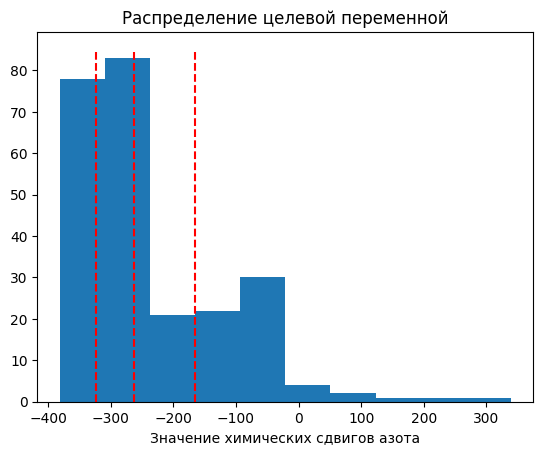

In [ ]:
plt.hist(df_1N.Target1)
plt.title('Распределение целевой переменной')
plt.xlabel('Значение химических сдвигов азота')
plt.vlines(x = [df_1N.Target1.astype('float16').describe()[4], df_1N.Target1.astype('float16').describe()[5], df_1N.Target1.astype('float16').describe()[6]], ymin=[0, 0, 0], ymax=[85, 85, 85], colors='red', ls='--')

In [ ]:
[df_1N.Target1.astype('float16').describe()[4], df_1N.Target1.astype('float16').describe()[5], df_1N.Target1.astype('float16').describe()[6]]

[-323.0, -262.25, -165.4375]

In [ ]:
df_1N.Target1.astype('float32').describe()

count    243.000000
mean    -231.747009
std      116.875244
min     -381.100006
25%     -322.899994
50%     -262.200012
75%     -165.450005
max      339.000000
Name: Target1, dtype: float64

In [ ]:
plt.hist(df_1N.Target1)
plt.title('Распределение целевой переменной')
plt.xlabel('Значение химических сдвигов азота')
plt.vlines(x = [df_1N.Target1.astype('float16').describe()[4], df_1N.Target1.astype('float16').describe()[5], df_1N.Target1.astype('float16').describe()[6]], ymin=[0, 0, 0], ymax=[85, 85, 85], colors='red', ls='--')

<ipython-input-12-27ac650326b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_1N.Target1, palette="tab10", orient = 'h')


Text(0.5, 0, 'Значение химических сдвигов азота')

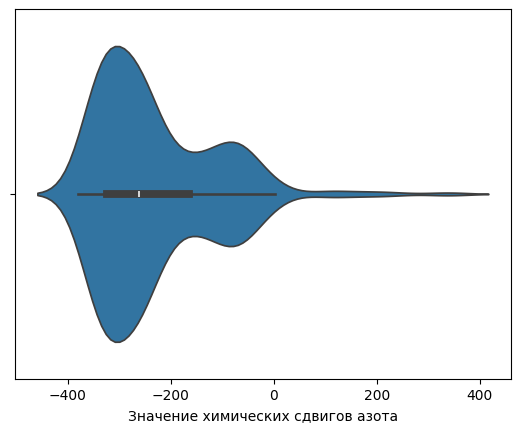

In [ ]:
sns.violinplot(df_1N.Target1, palette="tab10", orient = 'h')
plt.xlabel('Значение химических сдвигов азота')



```
# This is formatted as code
```

#Approaches

In [ ]:
!pip install rdkit
!pip install -q catboost
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import pandas as pd
import random
from sklearn.model_selection import train_test_split, KFold
import xgboost
import catboost
import lightgbm
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)
import optuna
from optuna.samplers import RandomSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from IPython.display import clear_output
import plotly.express as px
import plotly.graph_objects as go


random.seed(42)
np.random.seed(42)

####FP function

In [ ]:
def make_fingerprint(smiles):
  edit_smiles = re.sub(r'[^\w]', '', smiles)
  edit_smiles = re.sub(r'[\dlrniH]', '', edit_smiles)
  position = edit_smiles.index('N')

  mol = Chem.MolFromSmiles(smiles)

  bi = {}
  fp = Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, fromAtoms=[position], radius=3, bitInfo=bi, nBits=1024)

  tpsl = [(mol, x, bi) for x in fp.GetOnBits()]

  dic = {}
  for radius_fp in tpsl[0][2].items():
    dic[radius_fp[1][0][1]] = radius_fp[0]

  list_fp = [n_fp[1] for n_fp in sorted(dic.items())]

  while len(list_fp) != 4:
    list_fp.append(-100)

  return list_fp

make_fingerprint('C[Si](C)(C)CC1=CC=CC=N1')


[378, 428, 129, 539]

####Embeddings

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("ibm/MoLFormer-XL-both-10pct", deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

smiles = df_1N.SMILES.to_list()
inputs = tokenizer(smiles, padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
molformer = outputs.pooler_output.numpy()
molformer.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

configuration_molformer.py:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- configuration_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molformer.py:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- modeling_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/187M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenization_molformer_fast.py:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

tokenization_molformer.py:   0%|          | 0.00/9.48k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer_fast.py
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

(243, 768)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/SMILES_target.xlsx', decimal=',')

Mounted at /content/drive


In [ ]:
df_1N = df[df['Solvent'].notna()].query('N_count == 1').dropna(axis = 1).drop_duplicates('SMILES')
df_1N

Unnamed: 0                     InChiKey  \
0            12  MCRMUCXATQAAMN-HNNXBMFYSA-N   
2            36  JRKMVLFFQOHRHM-VHSXEESVSA-N   
4            38  OISVCGZHLKNMSJ-UHFFFAOYSA-O   
9            43  OISVCGZHLKNMSJ-UHFFFAOYSA-N   
22           92  SMUQFGGVLNAIOZ-UHFFFAOYSA-N   
..          ...                          ...   
929        2963  VOWZNBNDMFLQGM-UHFFFAOYSA-N   
933        2997  BRNULMACUQOKMR-UHFFFAOYSA-N   
935        2999  SQTIYIVNQVOBNL-UHFFFAOYSA-M   
937        3005  XRGCYDCLAPCXLB-UHFFFAOYSA-N   
939        3007  QUSNBJAOOMFDIB-UHFFFAOYSA-N   

                                                SMILES  N_count  \
0    C1=CC=C(C=C1)COC(=O)N[C@@H](CC2=CC=C(C=C2)O)C(...      1.0   
2                              C[C@H]1CC[C@H]2CCCCN2C1      1.0   
4                                  CC1=[NH+]C(=CC=C1)C      1.0   
9                                      CC1=NC(=CC=C1)C      1.0   
22                                CC1=NC2=CC=CC=C2C=C1      1.0   
..                                                 ...      ...   
929                                 CC1=CC(=C(C=C1)C)N      1.0   
933                                           C1CSCCN1      1.0   
935  C[N+]1=CC=C(C=C1)C2=CC=CS2.C(F)(F)(F)S(=O)(=O)...      1.0   
937                C1=CC=C(C=C1)OC2=CC=C(C=C2)NCC(=O)O      1.0   
939                                                CCN      1.0   

             Solvent Target1  
0               DMSO  -292.6  
2              CDCl3   -53.2  
4    TFA(C=14.5MOL%)    -177  
9             CHCl3    -69.1  
22         (CH3)2SO4   -73.1  
..               ...     ...  
929          DMSO-D6  -328.6  
933          DMSO-D6  -343.4  
935          DMSO-D6  -187.9  
937          DMSO-D6  -321.9  
939              H2O  -352.4  

[243 rows x 6 columns]

####Prepare df

In [ ]:
with open("file_smiles.txt", "w") as output:
      for row in df_1N.SMILES:
        output.write(str(row) + '\n')

In [ ]:
y_list = []

with open("file_smiles.txt", "r")as f:
  for smile in f:
    y_list.append(make_fingerprint(smile))

[10:00:22] WARNING: not removing hydrogen atom without neighbors


In [ ]:
df = pd.DataFrame(y_list, columns = ['FP1', 'FP2', 'FP3', 'FP4'])

df['Target']= list(df_1N.Target1)
df['SMILES'] = list(df_1N.SMILES)

In [ ]:
conditions = [
    (df['Target'] <= df.Target.describe()[4]),
    (df['Target'] > df.Target.describe()[4]) & (df['Target'] <= df.Target.describe()[5]),
    (df['Target'] > df.Target.describe()[5]) & (df['Target'] <= df.Target.describe()[6]),
    (df['Target'] > df.Target.describe()[7])
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Group'] = np.select(conditions, values)

x = df.drop(['SMILES', 'Target', 'Group'], axis = 1)
x

FP1  FP2  FP3   FP4
0    128  117  953   865
1    935  830  243   753
2    362  368  929    41
3    378  831  752   830
4    378  831  902   554
..   ...  ...  ...   ...
238  147  433   89   583
239   90  284  492  1010
240  463  691  816   849
241  128  392  652    49
242  147  981  317  -100

[243 rows x 4 columns]

In [ ]:
preprocessor = ColumnTransformer([("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'), x.columns)])

x_train, x_test, y_train, y_test = train_test_split(x, df.Target, test_size=0.2, stratify= df['Group'], random_state=42)

####Regressor for main - FP based

In [ ]:
xg_class = xgboost.XGBRegressor(booster = 'dart')
xg_class_pipeline = make_pipeline(preprocessor, xg_class)
xg_class_pipeline.fit(x_train, y_train)
y_pred = xg_class_pipeline.predict(x_test)

print(f"Mean absolute error XG: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error XG: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error XG: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Mean absolute error XG: 46.684
Mean squared error XG: 7988.665
Root mean squared error XG: 89.379
R2 score: 0.303


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Actual   Predicted
170   -88.1  -85.049957
180  -330.7 -273.708801
113   -61.9  -79.197006
17   -349.4 -343.896973
159   -52.0 -143.526138
86   -286.0 -285.895264
160  -257.1 -273.708801
142  -177.7 -173.038162
8    -335.2 -273.708801
176  -328.3 -253.424133
109  -246.2 -260.619202
207  -284.9 -282.098877
206  -332.8 -323.643005
132  -340.9 -330.483582
38   -262.1 -233.901489
25   -123.2 -116.948227
168  -315.9 -253.424133
145  -345.8 -323.158813
232  -129.1  -79.197006
237  -320.8 -323.138794
202  -342.9 -323.138794
91   -262.1  105.169342
54    -66.0  -82.245193
61   -326.6 -273.708801
85   -319.1 -323.643005
96    -45.1 -100.301620
87   -102.5 -102.483047
76    -67.2  -82.245193
147  -331.6 -254.406662
131  -285.5 -323.138794
129  -269.5 -273.708801
150  -199.6 -273.708801
20   -261.2 -222.322586
12   -240.8 -273.708801
29   -246.2 -247.579453
144  -303.8 -300.332825
233  -245.2 -273.708801
101  -278.1 -272.799194
221  -339.9 -278.721741
52   -248.8 -294.970947
225  -250.0 -260.721741
179  -315.2 -323.138794
22   -338.0 -161.401123
0    -292.6 -260.721741
191    99.1 -273.708801
35    -63.6  -79.197006
82   -317.0 -340.903931
81   -328.6 -323.138794
74   -147.6 -307.560669

In [ ]:
cat_class = catboost.CatBoostRegressor()
cat_class_pipeline = make_pipeline(preprocessor, cat_class)
cat_class_pipeline.fit(x_train, y_train)
y_pred = cat_class_pipeline.predict(x_test)
clear_output()

print(f"Mean absolute error Cat: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error Cat: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error Cat: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Mean absolute error Cat: 49.114
Mean squared error Cat: 5781.740
Root mean squared error Cat: 76.038
R2 score: 0.496


Actual   Predicted
170   -88.1  -98.864042
180  -330.7 -277.324623
113   -61.9  -94.874215
17   -349.4 -327.693416
159   -52.0 -136.030874
86   -286.0 -298.129300
160  -257.1 -274.891560
142  -177.7 -157.008905
8    -335.2 -273.957298
176  -328.3 -261.387340
109  -246.2 -275.070500
207  -284.9 -302.017262
206  -332.8 -278.724809
132  -340.9 -313.702128
38   -262.1 -238.967777
25   -123.2  -97.835474
168  -315.9 -261.387340
145  -345.8 -281.322270
232  -129.1  -94.874215
237  -320.8 -309.548401
202  -342.9 -307.235292
91   -262.1 -176.027531
54    -66.0  -91.329076
61   -326.6 -275.246456
85   -319.1 -278.724809
96    -45.1 -146.908382
87   -102.5 -184.581933
76    -67.2  -92.654579
147  -331.6 -243.923277
131  -285.5 -305.747398
129  -269.5 -277.324623
150  -199.6 -275.281663
20   -261.2 -255.505835
12   -240.8 -274.891560
29   -246.2 -272.247949
144  -303.8 -282.962308
233  -245.2 -275.246456
101  -278.1 -249.527840
221  -339.9 -289.850863
52   -248.8 -298.133408
225  -250.0 -275.314818
179  -315.2 -309.548401
22   -338.0 -170.352461
0    -292.6 -275.246456
191    99.1 -275.281663
35    -63.6  -94.874215
82   -317.0 -320.514463
81   -328.6 -305.747398
74   -147.6 -300.113303

In [ ]:
rf = RandomForestRegressor()
rf_pipeline = make_pipeline(preprocessor, rf)
rf_pipeline.fit(x_train, y_train)
y_pred = rf_pipeline.predict(x_test)

print(f"Mean absolute error RF: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error RF: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error RF: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")


Mean absolute error RF: 45.115
Mean squared error RF: 6490.252
Root mean squared error RF: 80.562
R2 score: 0.434


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn import svm
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  svc = svm.SVR(kernel= kernel)
  svc_pipelune = make_pipeline(preprocessor, svc)
  svc_pipelune.fit(x_train, y_train)
  y_pred = svc_pipelune.predict(x_test)
  print(f'MAE for {kernel} = {mean_absolute_error(y_test, y_pred):.3f}')

MAE for linear = 72.386
MAE for poly = 80.231
MAE for rbf = 79.325
MAE for sigmoid = 78.459


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh_pipelune = make_pipeline(preprocessor, neigh)
neigh_pipelune.fit(x_train, y_train)
y_pred = neigh_pipelune.predict(x_test)

print(f"Mean absolute error KNeighborsRegressor: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"Mean squared error KNeighborsRegressor: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Root mean squared error KNeighborsRegressor: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

Mean absolute error KNeighborsRegressor: 64.867
Mean squared error KNeighborsRegressor: 10536.856
Root mean squared error KNeighborsRegressor: 102.649


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


####Optune

#####Cat

In [ ]:
def objective(trial):
    # boundaries for the optimizer's
    param = {
    "depth": trial.suggest_int("depth", 1, 10),
    "subsample": trial.suggest_float("subsample", 0.05, 1.0),
    "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
    "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 21, step=2),
    "l2_leaf_reg": trial.suggest_categorical("l2_leaf_reg", [2, 5, 7, 9, 11]),
    "random_strength": trial.suggest_float("random_strength", 0, 4),
    "iterations": trial.suggest_int("iterations", 100, 3000, step=100),
    "learning_rate": trial.suggest_float("learning_rate", 0, 1)}
    #"objective": trial.suggest_categorical("objective", ["RMSE", "MultiRMSE", "MAE", "Quantile", "LogLinQuantile", "Poisson"])}

    model = catboost.CatBoostRegressor(**param, random_state=42, verbose=0)

    cat_class_pipeline = make_pipeline(preprocessor, model)
    cat_class_pipeline.fit(x_train, y_train)
    y_pred = cat_class_pipeline.predict(x_test)
    score = mean_absolute_error(y_test, y_pred)
    return score

# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=RandomSampler(42)
)

[I 2024-06-13 11:21:27,654] A new study created in memory with name: Optimizer


In [ ]:
study.optimize(
    objective, n_trials=30
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:21:30,326] Trial 0 finished with value: 47.40754387245819 and parameters: {'depth': 4, 'subsample': 0.9531785910894204, 'colsample_bylevel': 0.7453942447208348, 'min_data_in_leaf': 13, 'l2_leaf_reg': 9, 'random_strength': 2.832290311184182, 'iterations': 100, 'learning_rate': 0.9699098521619943}. Best is trial 0 with value: 47.40754387245819.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:21:42,367] Trial 1 finished with value: 43.127337101330454 and parameters: {'depth': 9, 'subsample': 0.25172215514436236, 'colsample_bylevel': 0.2227337188467456, 'min_data_in_leaf': 5, 'l2

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
cat_best = study.best_params

In [ ]:
cat_best

{'depth': 4,
 'subsample': 0.35892415592540966,
 'colsample_bylevel': 0.7431258694211609,
 'min_data_in_leaf': 15,
 'l2_leaf_reg': 2,
 'random_strength': 2.245108790277985,
 'iterations': 2400,
 'learning_rate': 0.49379559636439074}

In [ ]:
study.best_value

41.6398593828022

In [ ]:
optuna.visualization.plot_param_importances(study)

#####XG

In [ ]:
def objective(trial):
    # boundaries for the optimizer's
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0)
    }

    xg_class = xgboost.XGBRegressor(**param, random_state=42)
    xg_class_pipeline = make_pipeline(preprocessor, xg_class)
    xg_class_pipeline.fit(x_train, y_train)
    y_pred = xg_class_pipeline.predict(x_test)
    score = mean_absolute_error(y_test, y_pred)
    return score

# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=RandomSampler(42)
)


[I 2024-06-13 11:16:28,189] A new study created in memory with name: Optimizer


In [ ]:
study.optimize(
    objective, n_trials=30
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:16:31,520] Trial 0 finished with value: 95.1142052475287 and parameters: {'max_depth': 4, 'learning_rate': 0.951207163345817, 'n_estimators': 746, 'min_child_weight': 12, 'gamma': 0.16445845403801215, 'subsample': 0.19819479431939252, 'colsample_bytree': 0.10517943155978948, 'reg_alpha': 0.8675143843171859, 'reg_lambda': 0.6051038616257767}. Best is trial 0 with value: 95.1142052475287.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:16:33,665] Trial 1 finished with value: 89.29090376873404 and parameters: {'max_depth': 8, 'learning_rate': 0.03037864935284442, 'n_estimators':

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
xg_best = study.best_params

In [ ]:
study.best_value

47.11379050429987

In [ ]:
optuna.visualization.plot_param_importances(study)

#####RF

In [ ]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create and fit random forest model
    rf = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )

    rf_pipeline = make_pipeline(preprocessor, rf)
    rf_pipeline.fit(x_train, y_train)
    y_pred = rf_pipeline.predict(x_test)
    score = mean_absolute_error(y_test, y_pred)
    return score

# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=RandomSampler(42)
)

[I 2024-06-13 11:08:21,291] A new study created in memory with name: Optimizer


In [ ]:
study.optimize(
    objective, n_trials=30
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:08:24,117] Trial 0 finished with value: 53.808179102592106 and parameters: {'n_estimators': 81, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 53.808179102592106.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

[I 2024-06-13 11:08:24,197] Trial 1 finished with value: 54.93863507123333 and parameters: {'n_estimators': 39, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: 53.808179102592106.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
rf_best = study.best_params

In [ ]:
study.best_value

45.69820754832278

In [ ]:
optuna.visualization.plot_param_importances(study)

####Ensembles

In [ ]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19863 sha256=03c3b5d4db8ab4c2ddabe15d6123e6d1cdff27401448cc48b732b731b6ae5238
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
from vecstack import stacking
from sklearn.ensemble import VotingClassifier

df_models = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, param, model_name: str):
    current_model = model(**param, random_state = 42)
    pipeline = make_pipeline(preprocessor, current_model)
    pipeline.fit(X_tr, y_tr)
    y_pred_test = pipeline.predict(X_te)
    y_pred_train = pipeline.predict(X_tr)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models.loc[len(df_models.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(x_train, x_test, y_train, y_test, RandomForestRegressor, rf_best, 'RandomForestRegressor')
make_model(x_train, x_test, y_train, y_test, catboost.CatBoostRegressor, cat_best, 'CatBoostRegressor')
make_model(x_train, x_test, y_train, y_test, xgboost.XGBRegressor, xg_best, 'XGBRegressor')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



0:	learn: 106.2685722	total: 1.29ms	remaining: 3.1s
1:	learn: 101.7146538	total: 7.12ms	remaining: 8.53s
2:	learn: 99.7627748	total: 9.14ms	remaining: 7.31s
3:	learn: 93.1281758	total: 11.5ms	remaining: 6.88s
4:	learn: 90.3117938	total: 13.5ms	remaining: 6.46s
5:	learn: 88.9169506	total: 15.8ms	remaining: 6.29s
6:	learn: 85.5534966	total: 17.6ms	remaining: 6.03s
7:	learn: 82.7001228	total: 19.8ms	remaining: 5.93s
8:	learn: 81.4363125	total: 22.1ms	remaining: 5.88s
9:	learn: 79.7964738	total: 24.1ms	remaining: 5.75s
10:	learn: 77.5090506	total: 26.5ms	remaining: 5.75s
11:	learn: 75.0773919	total: 28.4ms	remaining: 5.66s
12:	learn: 72.2866183	total: 30.7ms	remaining: 5.64s
13:	learn: 69.0712443	total: 32.7ms	remaining: 5.57s
14:	learn: 66.1802143	total: 34.9ms	remaining: 5.54s
15:	learn: 63.9517452	total: 37.1ms	remaining: 5.53s
16:	learn: 61.7461875	total: 39.4ms	remaining: 5.53s
17:	learn: 59.8901143	total: 40.4ms	remaining: 5.34s
18:	learn: 58.6151863	total: 41.2ms	remaining: 5.16s
19

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



In [ ]:
df_models

Algorithm  r2_train   r2_test  mae_train   mae_test
0  RandomForestRegressor  0.880394  0.460796  27.197790  45.698208
1      CatBoostRegressor  0.980262  0.538505   3.159510  41.639859
2           XGBRegressor  0.538454  0.496097  50.376584  47.113791

In [ ]:
all_models = [RandomForestRegressor(**rf_best), catboost.CatBoostRegressor(**cat_best), xgboost.XGBRegressor(**xg_best)]

# computing the stack features
s_train, s_test = stacking(all_models, x_train, y_train, x_test, regression=True, shuffle=True, random_state = 42, n_folds=4)

# initializing the second-level model
final_model = catboost.CatBoostRegressor(**cat_best, random_state = 42, silent = True)

# fitting the second level model with stack features
stack_pipeline = make_pipeline(final_model)
stack_pipeline.fit(s_train, y_train)
y_pred = stack_pipeline.predict(x_test)
y_pred_train = stack_pipeline.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred)
df_models.loc[len(df_models.index)] = ['Stacking', r2_train, r2_test, mae_train, mae_test]

voting_model = VotingClassifier(
    estimators=[('rf', RandomForestRegressor(**rf_best, random_state = 42)), ('cat', catboost.CatBoostRegressor(**cat_best, random_state = 42)), ('xg', xgboost.XGBRegressor(**xg_best, random_state = 42))], voting='soft')
voting_pipeline = make_pipeline(preprocessor, final_model)
voting_pipeline.fit(x_train, y_train)
y_pred = voting_pipeline.predict(x_test)
y_pred_train = voting_pipeline.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred)
df_models.loc[len(df_models.index)] = ['Voting', r2_train, r2_test, mae_train, mae_test]

Streaming output truncated to the last 5000 lines.
2200:	learn: 9.2773177	total: 841ms	remaining: 76ms
2201:	learn: 9.2773177	total: 841ms	remaining: 75.7ms
2202:	learn: 9.2773177	total: 842ms	remaining: 75.3ms
2203:	learn: 9.2773177	total: 842ms	remaining: 74.9ms
2204:	learn: 9.2773177	total: 842ms	remaining: 74.5ms
2205:	learn: 9.2773177	total: 850ms	remaining: 74.7ms
2206:	learn: 9.2773177	total: 851ms	remaining: 74.4ms
2207:	learn: 9.2773177	total: 851ms	remaining: 74ms
2208:	learn: 9.2773177	total: 852ms	remaining: 73.7ms
2209:	learn: 9.2773177	total: 852ms	remaining: 73.3ms
2210:	learn: 9.2773177	total: 853ms	remaining: 72.9ms
2211:	learn: 9.2773177	total: 853ms	remaining: 72.5ms
2212:	learn: 9.2773177	total: 854ms	remaining: 72.2ms
2213:	learn: 9.2773177	total: 855ms	remaining: 71.8ms
2214:	learn: 9.2773177	total: 856ms	remaining: 71.5ms
2215:	learn: 9.2773177	total: 857ms	remaining: 71.1ms
2216:	learn: 9.2773177	total: 858ms	remaining: 70.8ms
2217:	learn: 9.2773177	total: 859ms

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



In [ ]:
df_models

Algorithm  r2_train   r2_test   mae_train    mae_test
0  RandomForestRegressor  0.880394  0.460796   27.197790   45.698208
1      CatBoostRegressor  0.980262  0.538505    3.159510   41.639859
2           XGBRegressor  0.538454  0.496097   50.376584   47.113791
3               Stacking -0.575159 -0.846147  131.920436  132.696763
4                 Voting  0.980262  0.538505    3.159510   41.639859
5               Stacking -0.620292 -0.931207  133.713021  135.277917
6                 Voting  0.980262  0.538505    3.159510   41.639859

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models.Algorithm, y=df_models.r2_train),
    go.Bar(name='r2_test', x=df_models.Algorithm, y=df_models.r2_test)
])
fig.update_layout(title='R2 for train and test', title_x=0.5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='mae_train', x=df_models.Algorithm, y=df_models.mae_train),
    go.Bar(name='mae_test', x=df_models.Algorithm, y=df_models.mae_test)
])
fig.update_layout(title='MAE for train and test', title_x=0.5)

In [ ]:
rf_model = RandomForestRegressor(**rf_best, random_state = 42)
pipeline = make_pipeline(preprocessor, rf_model)
pipeline.fit(x_train, y_train)
y_pred_rf = pipeline.predict(x_test)

xg_model = xgboost.XGBRegressor(**xg_best, random_state = 42)
pipeline = make_pipeline(preprocessor, xg_model)
pipeline.fit(x_train, y_train)
y_pred_xg = pipeline.predict(x_test)

cat_model = catboost.CatBoostRegressor(**cat_best, random_state = 42)
pipeline = make_pipeline(preprocessor, cat_model)
pipeline.fit(x_train, y_train)
y_pred_cat = pipeline.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



0:	learn: 106.2685722	total: 1.96ms	remaining: 4.69s
1:	learn: 101.7146538	total: 4.95ms	remaining: 5.93s
2:	learn: 99.7627748	total: 6.67ms	remaining: 5.33s
3:	learn: 93.1281758	total: 9.6ms	remaining: 5.75s
4:	learn: 90.3117938	total: 11.5ms	remaining: 5.51s
5:	learn: 88.9169506	total: 14.3ms	remaining: 5.71s
6:	learn: 85.5534966	total: 16.6ms	remaining: 5.69s
7:	learn: 82.7001228	total: 20.6ms	remaining: 6.15s
8:	learn: 81.4363125	total: 26.4ms	remaining: 7.01s
9:	learn: 79.7964738	total: 29.8ms	remaining: 7.13s
10:	learn: 77.5090506	total: 31.2ms	remaining: 6.77s
11:	learn: 75.0773919	total: 36.8ms	remaining: 7.32s
12:	learn: 72.2866183	total: 38.6ms	remaining: 7.08s
13:	learn: 69.0712443	total: 40ms	remaining: 6.81s
14:	learn: 66.1802143	total: 41.3ms	remaining: 6.57s
15:	learn: 63.9517452	total: 42.5ms	remaining: 6.33s
16:	learn: 61.7461875	total: 47.2ms	remaining: 6.62s
17:	learn: 59.8901143	total: 48.8ms	remaining: 6.45s
18:	learn: 58.6151863	total: 50.2ms	remaining: 6.29s
19:	

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



####Molformer

######Prepare df for every prediction I

In [ ]:
df_diff = pd.DataFrame(data=None)

for i in [165, 202, 292, 312, 319, 541, 562, 725]:
  df_diff[f'f_{i}'] = molformer[y_test.index,i]

df_diff['Target'] = y_test.to_list()

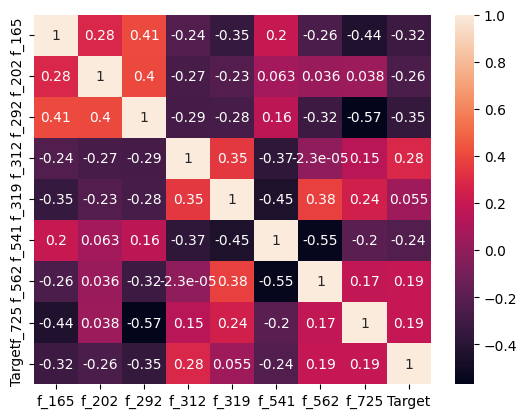

In [ ]:
corr_matrix = df_diff.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df_diff['Group'] = df['Group'][y_test.index].to_list()

In [ ]:
df_diff

f_165     f_202     f_292     f_312     f_319     f_541     f_562  \
0  -1.049763 -0.428490 -0.202114  0.052378 -0.140709 -0.922710  0.226635   
1  -0.335423  0.402754  0.705258  0.170560 -0.434691 -0.959110 -0.632432   
2  -0.797909 -0.816990  0.029014  0.096814 -0.696449 -0.506518  0.154284   
3  -0.166364 -0.045744  0.049330 -0.202214 -0.333307  0.181744 -0.313841   
4  -0.434703 -0.717119 -0.571624 -0.089604  0.121378 -0.880045  0.296335   
5  -0.349002 -0.728660 -0.139271  0.714881 -0.034850 -0.455549 -0.267941   
6  -0.786991 -0.001451 -0.285967  0.242377 -0.511427 -0.811358  0.095673   
7  -1.028896 -0.671197 -0.140491 -0.058369  0.482740 -1.044499  0.245171   
8  -0.265376 -0.136878  0.131731 -0.762993 -0.594694 -0.350022  0.522966   
9  -0.142463  0.356571  0.599991 -0.770941 -0.935674  0.287385 -0.142968   
10 -0.598768 -0.735782  0.096096  0.170890  0.054890 -0.705414 -0.201808   
11 -0.642881 -0.169753  0.054807  0.597680  0.614437 -0.207737 -0.063769   
12 -0.408952 -0.212686  0.927702 -0.144039 -0.241113 -0.638517  0.104860   
13  0.007346 -1.136797  0.238169  0.841550 -0.050526 -0.951973 -0.090138   
14 -0.321835 -0.362954 -0.216202 -0.027431 -0.015204 -0.344579 -0.001190   
15 -1.019458 -0.334243 -0.286455  0.336119 -0.019019 -0.597477  0.301144   
16 -0.356596  0.520626  0.682480 -1.098512 -1.171314 -0.051260 -0.167442   
17 -0.834440 -0.300684  0.418152  0.092257 -0.090932 -0.047783 -0.040704   
18 -0.572621 -0.359885 -0.567100  0.348309 -0.070393 -0.757116  0.546389   
19 -0.535386 -0.007912  0.358605  0.159419  0.461218 -0.728247 -0.103032   
20 -0.334959  0.165144  0.476924 -0.234439 -0.143006 -0.173811 -0.307866   
21 -0.988969 -0.625810 -0.099302  0.487167 -0.181884 -1.025330 -0.075803   
22 -0.634653 -0.742626 -0.324321 -0.073410 -0.003165 -0.479506 -0.481641   
23 -1.026518 -0.961950  0.102484  0.051109 -0.762327 -0.269655 -0.142787   
24 -0.469352 -1.151751  0.361274 -0.600482 -0.051741  0.054621 -0.387627   
25 -0.790036 -0.080501  0.517472 -0.110354  0.578157 -1.310792  0.807963   
26 -0.975875 -1.005689  0.247037  0.274638  0.436259 -0.221390  0.088217   
27 -0.929882 -0.473654 -0.390380  0.405995  0.111408 -0.805937  0.162961   
28 -0.678008 -0.345011 -0.151477  0.808558 -0.233899 -0.609076 -0.141038   
29 -0.460414 -0.569497  0.348039  0.600878  0.191625 -0.918059  0.162737   
30 -0.616263 -0.351290  0.662112  0.381772 -0.440267 -0.173660 -0.934165   
31 -0.213300  0.171508 -0.027211  0.497011 -0.297412 -0.334920 -0.024458   
32 -0.648720 -0.313142 -0.220969  0.318896  0.260408 -0.584158  0.366402   
33 -0.826528 -1.228684  0.275158 -0.035743 -0.402587 -0.252291 -0.472991   
34 -1.027975 -0.579503 -0.361206  0.582583 -0.012168 -0.859214  0.392505   
35 -0.383108  0.024662  0.703759 -0.751078 -0.578311 -0.083292 -0.396288   
36  0.523963 -0.515417  0.291209 -0.335750 -0.570678 -0.638535 -0.259226   
37 -0.442411 -0.602060  0.188690  0.180908 -0.007289 -0.712766  0.118453   
38 -0.808010  0.014851  0.730108  0.261158  0.802043 -1.414050  0.453526   
39 -0.213458  0.236726  0.821225  0.291572 -0.611027 -0.492485  0.064133   
40 -0.640229 -0.716871  0.261750 -0.187774 -0.291751 -0.026561 -0.348224   
41 -0.339029 -0.054915  0.532774  0.475236  0.098791 -0.861109 -0.516771   
42 -1.074015 -0.586834 -0.735705 -0.007695  0.318940 -0.867337  0.367522   
43 -0.440501 -0.501927  0.119799  0.127823  0.027314 -0.567765  0.309587   
44 -0.768796 -0.459769  0.199153  1.069802 -0.605399 -0.412249 -0.334169   
45 -0.161079 -0.570285  0.363758  0.519917 -0.703111 -0.599983 -0.359377   
46 -0.541255 -0.464508 -0.027317  0.119229 -0.115750  0.888058 -0.745820   
47 -0.303295  0.042520  0.537055 -0.206168 -0.701858 -0.308097  0.180602   
48 -1.141410 -0.296768 -0.061784  0.166349 -0.342244 -0.235876 -0.267665   

       f_725  Target Group  
0   1.018783   -88.1     0  
1   0.332168  -330.7     1  
2   0.768271   -61.9     0  
3   0.730874  -349.4     1  
4   1.037793   -52.0     0  
5   0.345957  -286.0     2  
6  

In [ ]:
df_diff_rf = df_diff.copy()
df_diff_rf['Base'] = y_pred_rf
df_diff_xg = df_diff.copy()
df_diff_xg['Base'] = y_pred_xg
df_diff_cat = df_diff.copy()
df_diff_cat['Base'] = y_pred_cat

In [ ]:
df_diff_cat

f_165     f_202     f_292     f_312     f_319     f_541     f_562  \
0  -1.049763 -0.428490 -0.202114  0.052378 -0.140709 -0.922710  0.226635   
1  -0.335423  0.402754  0.705258  0.170560 -0.434691 -0.959110 -0.632432   
2  -0.797909 -0.816990  0.029014  0.096814 -0.696449 -0.506518  0.154284   
3  -0.166364 -0.045744  0.049330 -0.202214 -0.333307  0.181744 -0.313841   
4  -0.434703 -0.717119 -0.571624 -0.089604  0.121378 -0.880045  0.296335   
5  -0.349002 -0.728660 -0.139271  0.714881 -0.034850 -0.455549 -0.267941   
6  -0.786991 -0.001451 -0.285967  0.242377 -0.511427 -0.811358  0.095673   
7  -1.028896 -0.671197 -0.140491 -0.058369  0.482740 -1.044499  0.245171   
8  -0.265376 -0.136878  0.131731 -0.762993 -0.594694 -0.350022  0.522966   
9  -0.142463  0.356571  0.599991 -0.770941 -0.935674  0.287385 -0.142968   
10 -0.598768 -0.735782  0.096096  0.170890  0.054890 -0.705414 -0.201808   
11 -0.642881 -0.169753  0.054807  0.597680  0.614437 -0.207737 -0.063769   
12 -0.408952 -0.212686  0.927702 -0.144039 -0.241113 -0.638517  0.104860   
13  0.007346 -1.136797  0.238169  0.841550 -0.050526 -0.951973 -0.090138   
14 -0.321835 -0.362954 -0.216202 -0.027431 -0.015204 -0.344579 -0.001190   
15 -1.019458 -0.334243 -0.286455  0.336119 -0.019019 -0.597477  0.301144   
16 -0.356596  0.520626  0.682480 -1.098512 -1.171314 -0.051260 -0.167442   
17 -0.834440 -0.300684  0.418152  0.092257 -0.090932 -0.047783 -0.040704   
18 -0.572621 -0.359885 -0.567100  0.348309 -0.070393 -0.757116  0.546389   
19 -0.535386 -0.007912  0.358605  0.159419  0.461218 -0.728247 -0.103032   
20 -0.334959  0.165144  0.476924 -0.234439 -0.143006 -0.173811 -0.307866   
21 -0.988969 -0.625810 -0.099302  0.487167 -0.181884 -1.025330 -0.075803   
22 -0.634653 -0.742626 -0.324321 -0.073410 -0.003165 -0.479506 -0.481641   
23 -1.026518 -0.961950  0.102484  0.051109 -0.762327 -0.269655 -0.142787   
24 -0.469352 -1.151751  0.361274 -0.600482 -0.051741  0.054621 -0.387627   
25 -0.790036 -0.080501  0.517472 -0.110354  0.578157 -1.310792  0.807963   
26 -0.975875 -1.005689  0.247037  0.274638  0.436259 -0.221390  0.088217   
27 -0.929882 -0.473654 -0.390380  0.405995  0.111408 -0.805937  0.162961   
28 -0.678008 -0.345011 -0.151477  0.808558 -0.233899 -0.609076 -0.141038   
29 -0.460414 -0.569497  0.348039  0.600878  0.191625 -0.918059  0.162737   
30 -0.616263 -0.351290  0.662112  0.381772 -0.440267 -0.173660 -0.934165   
31 -0.213300  0.171508 -0.027211  0.497011 -0.297412 -0.334920 -0.024458   
32 -0.648720 -0.313142 -0.220969  0.318896  0.260408 -0.584158  0.366402   
33 -0.826528 -1.228684  0.275158 -0.035743 -0.402587 -0.252291 -0.472991   
34 -1.027975 -0.579503 -0.361206  0.582583 -0.012168 -0.859214  0.392505   
35 -0.383108  0.024662  0.703759 -0.751078 -0.578311 -0.083292 -0.396288   
36  0.523963 -0.515417  0.291209 -0.335750 -0.570678 -0.638535 -0.259226   
37 -0.442411 -0.602060  0.188690  0.180908 -0.007289 -0.712766  0.118453   
38 -0.808010  0.014851  0.730108  0.261158  0.802043 -1.414050  0.453526   
39 -0.213458  0.236726  0.821225  0.291572 -0.611027 -0.492485  0.064133   
40 -0.640229 -0.716871  0.261750 -0.187774 -0.291751 -0.026561 -0.348224   
41 -0.339029 -0.054915  0.532774  0.475236  0.098791 -0.861109 -0.516771   
42 -1.074015 -0.586834 -0.735705 -0.007695  0.318940 -0.867337  0.367522   
43 -0.440501 -0.501927  0.119799  0.127823  0.027314 -0.567765  0.309587   
44 -0.768796 -0.459769  0.199153  1.069802 -0.605399 -0.412249 -0.334169   
45 -0.161079 -0.570285  0.363758  0.519917 -0.703111 -0.599983 -0.359377   
46 -0.541255 -0.464508 -0.027317  0.119229 -0.115750  0.888058 -0.745820   
47 -0.303295  0.042520  0.537055 -0.206168 -0.701858 -0.308097  0.180602   
48 -1.141410 -0.296768 -0.061784  0.166349 -0.342244 -0.235876 -0.267665   

       f_725  Target Group        Base  
0   1.018783   -88.1     0  -90.862934  
1   0.332168  -330.7     1 -279.230295  
2   0.768271   -61.9     0  -80.118456  
3   0.730874  -349.4     1 -346.796208  
4

##### 1 attempt - only y_test w/o Standard Scaler

Cat

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df_diff_cat.drop(['Target', 'Group'], axis = 1), df_diff_cat.Target, test_size=0.2, stratify= df_diff_cat['Group'], random_state=42)

df_models_cat = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_cat.loc[len(df_models_cat.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')

Learning rate set to 0.024523
0:	learn: 109.1573984	total: 653us	remaining: 652ms
1:	learn: 108.3300636	total: 1.53ms	remaining: 763ms
2:	learn: 107.5470273	total: 2.38ms	remaining: 791ms
3:	learn: 106.5894771	total: 3.18ms	remaining: 793ms
4:	learn: 105.9330386	total: 4.04ms	remaining: 803ms
5:	learn: 105.0342194	total: 4.8ms	remaining: 796ms
6:	learn: 104.3088902	total: 5.58ms	remaining: 792ms
7:	learn: 103.5968321	total: 6.34ms	remaining: 787ms
8:	learn: 102.8557830	total: 7.1ms	remaining: 781ms
9:	learn: 102.0781023	total: 7.95ms	remaining: 787ms
10:	learn: 101.1441166	total: 8.74ms	remaining: 786ms
11:	learn: 100.1236431	total: 9.64ms	remaining: 793ms
12:	learn: 99.4345085	total: 10.4ms	remaining: 789ms
13:	learn: 98.7101791	total: 11.2ms	remaining: 787ms
14:	learn: 97.9568706	total: 12ms	remaining: 788ms
15:	learn: 97.4280657	total: 12.7ms	remaining: 784ms
16:	learn: 96.7176123	total: 13.5ms	remaining: 780ms
17:	learn: 96.2109370	total: 14.3ms	remaining: 779ms
18:	learn: 95.42869

In [ ]:
df_models_cat

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.556133  0.902625  50.486535  20.120351
1             Ridge  0.549709  0.959170  48.549044  13.481485
2             Lasso  0.546803  0.961209  49.167361  14.419125
3        ElasticNet  0.495276  0.939634  47.745963  18.277382
4  GradientBoosting  0.999550  0.924187   1.927355  18.720321
5      RandomForest  0.902952  0.897541  21.096513  25.181800
6           XGBoost  1.000000  0.831808   0.000469  35.093678
7          CatBoost  0.999982  0.720014   0.384131  40.558387
8               KNN  0.577659  0.793144  48.426667  40.202000
9               SVM -0.052447  0.058068  81.281605  67.621561

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='mae_train', x=df_models_cat.Algorithm, y=df_models_cat.mae_train),
    go.Bar(name='mae_test', x=df_models_cat.Algorithm, y=df_models_cat.mae_test)
])
fig.update_layout(title='MAE for train and test', title_x=0.5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models_cat.Algorithm, y=df_models_cat.r2_train),
    go.Bar(name='r2_test', x=df_models_cat.Algorithm, y=df_models_cat.r2_test)
])
fig.update_layout(title='R2 for train and test', title_x=0.5)

In [ ]:
model = Ridge(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Actual   Predicted
41  -315.2 -293.355823
8   -335.2 -336.007643
14  -262.1 -243.098291
47  -328.6 -326.176121
26  -102.5 -113.093450
32  -261.2 -245.964289
10  -246.2 -247.772721
46  -317.0 -323.296250
45   -63.6  -16.427657
20  -342.9 -352.766967

Xg

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_xg.drop(['Target', 'Group'], axis = 1), df_diff_xg.Target, test_size=0.2, stratify= df_diff_xg['Group'], random_state=42)

df_models_xg = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_xg.loc[len(df_models_xg.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')

Learning rate set to 0.024523
0:	learn: 109.0897921	total: 1.61ms	remaining: 1.6s
1:	learn: 108.2892764	total: 4.1ms	remaining: 2.05s
2:	learn: 107.4447941	total: 5.85ms	remaining: 1.94s
3:	learn: 106.4795695	total: 7.64ms	remaining: 1.9s
4:	learn: 105.9017549	total: 9.22ms	remaining: 1.83s
5:	learn: 105.1876335	total: 10.9ms	remaining: 1.8s
6:	learn: 104.4240039	total: 12.5ms	remaining: 1.77s
7:	learn: 103.6917638	total: 14.1ms	remaining: 1.75s
8:	learn: 103.0084263	total: 15.8ms	remaining: 1.74s
9:	learn: 102.3314948	total: 17.6ms	remaining: 1.74s
10:	learn: 101.5205523	total: 19.3ms	remaining: 1.74s
11:	learn: 100.8815579	total: 21.2ms	remaining: 1.75s
12:	learn: 100.1420935	total: 23ms	remaining: 1.74s
13:	learn: 99.4546478	total: 24.6ms	remaining: 1.74s
14:	learn: 98.6779984	total: 26.4ms	remaining: 1.73s
15:	learn: 98.0427654	total: 28.1ms	remaining: 1.73s
16:	learn: 97.1664704	total: 29.9ms	remaining: 1.73s
17:	learn: 96.6578655	total: 31.6ms	remaining: 1.72s
18:	learn: 96.09194

In [ ]:
df_models_xg

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.554624  0.755046  49.582973  40.034000
1             Ridge  0.547422  0.871306  47.866073  29.336199
2             Lasso  0.546555  0.879376  48.344697  27.223189
3        ElasticNet  0.467541  0.917372  50.926391  23.392042
4  GradientBoosting  0.999487  0.841829   2.110132  28.805066
5      RandomForest  0.891286  0.863876  22.648359  31.493600
6           XGBoost  1.000000  0.897075   0.000443  24.829173
7          CatBoost  0.999979  0.638895   0.422434  47.160924
8               KNN  0.495955  0.761614  52.492821  41.564000
9               SVM -0.056534  0.054689  81.556275  68.279665

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='mae_train', x=df_models_xg.Algorithm, y=df_models_xg.mae_train),
    go.Bar(name='mae_test', x=df_models_xg.Algorithm, y=df_models_xg.mae_test)
])
fig.update_layout(title='MAE for train and test', title_x=0.5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models_xg.Algorithm, y=df_models_xg.r2_train),
    go.Bar(name='r2_test', x=df_models_xg.Algorithm, y=df_models_xg.r2_test)
])
fig.update_layout(title='R2 for train and test', title_x=0.5)

In [ ]:
model = ElasticNet(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
df_analysis = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_analysis

Actual   Predicted
41  -315.2 -309.060181
8   -335.2 -291.782043
14  -262.1 -279.319641
47  -328.6 -307.735962
26  -102.5  -58.349689
32  -261.2 -264.423981
10  -246.2 -263.475647
46  -317.0 -294.816772
45   -63.6  -90.141830
20  -342.9 -309.996033

RF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_rf.drop(['Target', 'Group'], axis = 1), df_diff_rf.Target, test_size=0.2, stratify= df_diff_rf['Group'], random_state=42)

df_models_rf = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_rf.loc[len(df_models_rf.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')

Learning rate set to 0.024523
0:	learn: 108.8650793	total: 943us	remaining: 943ms
1:	learn: 107.9652577	total: 2.15ms	remaining: 1.07s
2:	learn: 107.0689100	total: 2.81ms	remaining: 933ms
3:	learn: 106.1663263	total: 3.67ms	remaining: 913ms
4:	learn: 105.3917413	total: 4.54ms	remaining: 904ms
5:	learn: 104.8041360	total: 5.4ms	remaining: 894ms
6:	learn: 104.0959716	total: 6.33ms	remaining: 899ms
7:	learn: 103.3908434	total: 9.34ms	remaining: 1.16s
8:	learn: 102.6928652	total: 13.3ms	remaining: 1.46s
9:	learn: 101.8982139	total: 14.2ms	remaining: 1.4s
10:	learn: 101.0964176	total: 14.8ms	remaining: 1.33s
11:	learn: 100.3763038	total: 15.5ms	remaining: 1.28s
12:	learn: 99.7648562	total: 19ms	remaining: 1.44s
13:	learn: 99.0766496	total: 19.9ms	remaining: 1.4s
14:	learn: 98.1729554	total: 20.8ms	remaining: 1.37s
15:	learn: 97.5584029	total: 21.7ms	remaining: 1.33s
16:	learn: 96.8526230	total: 22.4ms	remaining: 1.3s
17:	learn: 96.3288224	total: 23.2ms	remaining: 1.26s
18:	learn: 95.5882457

In [ ]:
df_models_rf

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.514840  0.815157  53.386447  33.450302
1             Ridge  0.509616  0.854488  50.882482  29.276261
2             Lasso  0.508757  0.838667  50.993354  30.460495
3        ElasticNet  0.447104  0.835886  52.078920  31.399018
4  GradientBoosting  0.999369  0.559165   2.215260  39.313286
5      RandomForest  0.897612  0.578346  21.673282  41.837400
6           XGBoost  1.000000  0.415231   0.000497  42.429932
7          CatBoost  0.999966  0.393604   0.536638  54.109889
8               KNN  0.514994  0.752880  53.085128  43.348000
9               SVM -0.054192  0.043823  81.378238  68.358398

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='mae_train', x=df_models_rf.Algorithm, y=df_models_rf.mae_train),
    go.Bar(name='mae_test', x=df_models_rf.Algorithm, y=df_models_rf.mae_test)
])
fig.update_layout(title='MAE for train and test', title_x=0.5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models_rf.Algorithm, y=df_models_rf.r2_train),
    go.Bar(name='r2_test', x=df_models_rf.Algorithm, y=df_models_rf.r2_test)
])
fig.update_layout(title='R2 for train and test', title_x=0.5)

In [ ]:
model = Ridge(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
df_analysis = pd.DataFrame({"Actual": y_train, "Predicted": y_pred_train})
df_analysis

Actual   Predicted
22   -66.0  -94.835965
40  -250.0 -263.606657
23  -326.6 -242.118979
44    99.1 -197.829036
33  -240.8 -279.862611
31  -199.6 -258.677758
37  -278.1 -253.661625
1   -330.7 -266.207356
19  -320.8 -321.142582
29  -285.5 -287.051744
39  -248.8 -251.964933
35  -303.8 -321.184795
28  -331.6 -224.123028
12  -332.8 -302.620057
18  -129.1  -74.257918
43  -292.6 -267.216009
27   -67.2  -70.276002
6   -257.1 -277.604101
24  -319.1 -338.615152
16  -315.9 -298.081324
3   -349.4 -320.208819
34  -246.2 -251.200466
9   -328.3 -282.156806
21  -262.1 -169.489560
0    -88.1  -92.149302
36  -245.2 -296.497107
2    -61.9  -52.477249
38  -339.9 -293.459417
4    -52.0 -178.359717
7   -177.7 -182.267604
42  -338.0 -207.837883
5   -286.0 -258.701828
13  -340.9 -265.112221
48  -147.6 -283.700991
30  -269.5 -234.001568
25   -45.1 -206.881875
17  -345.8 -276.559702
11  -284.9 -280.637331
15  -123.2 -106.162923

##### 1 attempt - only y_test with Standard Scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_cat.drop(['Target', 'Group'], axis = 1), df_diff_cat.Target, test_size=0.2, stratify= df_diff_cat['Group'], random_state=42)
scaler = StandardScaler()

df_models_cat = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(scaler.fit_transform(X_tr), y_tr)
    y_pred_train = model.predict(scaler.transform(X_tr))
    y_pred_test = model.predict(scaler.transform(X_te))
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_cat.loc[len(df_models_cat.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')


Learning rate set to 0.024523
0:	learn: 109.1573984	total: 914us	remaining: 913ms
1:	learn: 108.3300636	total: 2.25ms	remaining: 1.12s
2:	learn: 107.5470273	total: 4.07ms	remaining: 1.35s
3:	learn: 106.5894771	total: 5.76ms	remaining: 1.44s
4:	learn: 105.9330386	total: 7.65ms	remaining: 1.52s
5:	learn: 105.0342194	total: 9.56ms	remaining: 1.58s
6:	learn: 104.3088902	total: 11.8ms	remaining: 1.67s
7:	learn: 103.5968321	total: 12.7ms	remaining: 1.58s
8:	learn: 102.8557830	total: 14.8ms	remaining: 1.63s
9:	learn: 102.0781023	total: 16.9ms	remaining: 1.68s
10:	learn: 101.1441166	total: 19.2ms	remaining: 1.73s
11:	learn: 100.1236431	total: 22.3ms	remaining: 1.84s
12:	learn: 99.4345085	total: 26.4ms	remaining: 2s
13:	learn: 98.7101791	total: 28.1ms	remaining: 1.98s
14:	learn: 97.9568706	total: 29.8ms	remaining: 1.96s
15:	learn: 97.4280657	total: 31.6ms	remaining: 1.94s
16:	learn: 96.7176123	total: 33.3ms	remaining: 1.92s
17:	learn: 96.2109370	total: 34.9ms	remaining: 1.91s
18:	learn: 95.4286

In [ ]:
df_models_cat

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.556133  0.902625  50.486535  20.120351
1             Ridge  0.554354  0.939777  49.187927  17.391186
2             Lasso  0.553391  0.946968  49.418834  15.820672
3        ElasticNet  0.462907  0.806339  57.117195  35.234982
4  GradientBoosting  0.999550  0.924187   1.927355  18.720321
5      RandomForest  0.902952  0.897541  21.096513  25.181800
6           XGBoost  1.000000  0.831808   0.000469  35.093678
7          CatBoost  0.999982  0.720014   0.384131  40.558387
8               KNN  0.391400  0.507396  60.532308  48.422000
9               SVM -0.069897  0.002454  81.542378  69.316918

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='mae_train', x=df_models_cat.Algorithm, y=df_models_cat.mae_train),
    go.Bar(name='mae_test', x=df_models_cat.Algorithm, y=df_models_cat.mae_test)
])
fig.update_layout(title='MAE for train and test', title_x=0.5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models_cat.Algorithm, y=df_models_cat.r2_train),
    go.Bar(name='r2_test', x=df_models_cat.Algorithm, y=df_models_cat.r2_test)
])
fig.update_layout(title='R2 for train and test', title_x=0.5)

Xg

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_xg.drop(['Target', 'Group'], axis = 1), df_diff_xg.Target, test_size=0.2, stratify= df_diff_xg['Group'], random_state=42)
scaler = StandardScaler()

df_models_xg = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(scaler.fit_transform(X_tr), y_tr)
    y_pred_train = model.predict(scaler.transform(X_tr))
    y_pred_test = model.predict(scaler.transform(X_te))
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_xg.loc[len(df_models_xg.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')


Learning rate set to 0.024523
0:	learn: 109.0897921	total: 975us	remaining: 974ms
1:	learn: 108.2892764	total: 1.84ms	remaining: 917ms
2:	learn: 107.4447941	total: 6.1ms	remaining: 2.03s
3:	learn: 106.4795695	total: 7.69ms	remaining: 1.91s
4:	learn: 105.9017549	total: 9.62ms	remaining: 1.91s
5:	learn: 105.1876335	total: 11.7ms	remaining: 1.93s
6:	learn: 104.4240039	total: 20ms	remaining: 2.84s
7:	learn: 103.6917638	total: 25.1ms	remaining: 3.11s
8:	learn: 103.0084263	total: 27.1ms	remaining: 2.98s
9:	learn: 102.3314948	total: 28.3ms	remaining: 2.8s
10:	learn: 101.5205523	total: 30.3ms	remaining: 2.72s
11:	learn: 100.8815579	total: 32.2ms	remaining: 2.65s
12:	learn: 100.1420935	total: 33.9ms	remaining: 2.58s
13:	learn: 99.4546478	total: 37.6ms	remaining: 2.65s
14:	learn: 98.6779984	total: 39.6ms	remaining: 2.6s
15:	learn: 98.0427654	total: 41.5ms	remaining: 2.55s
16:	learn: 97.1664704	total: 43.2ms	remaining: 2.5s
17:	learn: 96.6578655	total: 45ms	remaining: 2.45s
18:	learn: 96.0919452	

In [ ]:
df_models_xg

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.554624  0.755046  49.582957  40.033965
1             Ridge  0.552662  0.840086  48.628373  33.232729
2             Lasso  0.552429  0.838454  48.685931  32.970664
3        ElasticNet  0.450688  0.831106  56.562765  33.156945
4  GradientBoosting  0.999487  0.841829   2.110132  28.805066
5      RandomForest  0.891286  0.863876  22.648359  31.493600
6           XGBoost  1.000000  0.897075   0.000443  24.829173
7          CatBoost  0.999979  0.638895   0.422434  47.160924
8               KNN  0.427494  0.745165  58.328205  41.930000
9               SVM -0.070358  0.002008  81.577888  69.511606

RF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_rf.drop(['Target', 'Group'], axis = 1), df_diff_rf.Target, test_size=0.2, stratify= df_diff_rf['Group'], random_state=42)
scaler = StandardScaler()

df_models_rf = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(scaler.fit_transform(X_tr), y_tr)
    y_pred_train = model.predict(scaler.transform(X_tr))
    y_pred_test = model.predict(scaler.transform(X_te))
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_rf.loc[len(df_models_rf.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')

Learning rate set to 0.024523
0:	learn: 108.8650793	total: 4ms	remaining: 3.99s
1:	learn: 107.9652577	total: 5.23ms	remaining: 2.61s
2:	learn: 107.0689100	total: 6.08ms	remaining: 2.02s
3:	learn: 106.1663263	total: 6.9ms	remaining: 1.72s
4:	learn: 105.3917413	total: 7.54ms	remaining: 1.5s
5:	learn: 104.8041360	total: 8.09ms	remaining: 1.34s
6:	learn: 104.0959716	total: 8.64ms	remaining: 1.23s
7:	learn: 103.3908434	total: 9.16ms	remaining: 1.14s
8:	learn: 102.6928652	total: 9.68ms	remaining: 1.06s
9:	learn: 101.8982139	total: 10.2ms	remaining: 1.01s
10:	learn: 101.0964176	total: 10.7ms	remaining: 963ms
11:	learn: 100.3763038	total: 11.2ms	remaining: 923ms
12:	learn: 99.7648562	total: 11.7ms	remaining: 888ms
13:	learn: 99.0766496	total: 12.2ms	remaining: 859ms
14:	learn: 98.1729554	total: 12.7ms	remaining: 837ms
15:	learn: 97.5584029	total: 13.3ms	remaining: 816ms
16:	learn: 96.8526230	total: 13.8ms	remaining: 796ms
17:	learn: 96.3288224	total: 14.3ms	remaining: 778ms
18:	learn: 95.58824

In [ ]:
df_models_rf

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.514840  0.815157  53.386447  33.450302
1             Ridge  0.513350  0.838907  52.326662  30.908442
2             Lasso  0.512665  0.840257  51.767175  30.870353
3        ElasticNet  0.427186  0.680706  58.880359  44.386430
4  GradientBoosting  0.999369  0.559165   2.215260  39.313286
5      RandomForest  0.897612  0.578346  21.673282  41.837400
6           XGBoost  1.000000  0.415231   0.000497  42.429932
7          CatBoost  0.999966  0.393604   0.536638  54.109889
8               KNN  0.393428  0.340886  59.805641  54.260000
9               SVM -0.070599 -0.001018  81.571495  69.528252

##### y_test and predict differencies

In [ ]:
df_diff_diff_cat = df_diff_cat.copy()
df_diff_diff_cat['Target'] = df_diff_diff_cat['Target'] - df_diff_diff_cat['Base']
df_diff_diff_cat = df_diff_diff_cat.drop(['Base'], axis = 1)
df_diff_diff_cat

f_165     f_202     f_292     f_312     f_319     f_541     f_562  \
0  -1.049763 -0.428490 -0.202114  0.052378 -0.140709 -0.922710  0.226635   
1  -0.335423  0.402754  0.705258  0.170560 -0.434691 -0.959110 -0.632432   
2  -0.797909 -0.816990  0.029014  0.096814 -0.696449 -0.506518  0.154284   
3  -0.166364 -0.045744  0.049330 -0.202214 -0.333307  0.181744 -0.313841   
4  -0.434703 -0.717119 -0.571624 -0.089604  0.121378 -0.880045  0.296335   
5  -0.349002 -0.728660 -0.139271  0.714881 -0.034850 -0.455549 -0.267941   
6  -0.786991 -0.001451 -0.285967  0.242377 -0.511427 -0.811358  0.095673   
7  -1.028896 -0.671197 -0.140491 -0.058369  0.482740 -1.044499  0.245171   
8  -0.265376 -0.136878  0.131731 -0.762993 -0.594694 -0.350022  0.522966   
9  -0.142463  0.356571  0.599991 -0.770941 -0.935674  0.287385 -0.142968   
10 -0.598768 -0.735782  0.096096  0.170890  0.054890 -0.705414 -0.201808   
11 -0.642881 -0.169753  0.054807  0.597680  0.614437 -0.207737 -0.063769   
12 -0.408952 -0.212686  0.927702 -0.144039 -0.241113 -0.638517  0.104860   
13  0.007346 -1.136797  0.238169  0.841550 -0.050526 -0.951973 -0.090138   
14 -0.321835 -0.362954 -0.216202 -0.027431 -0.015204 -0.344579 -0.001190   
15 -1.019458 -0.334243 -0.286455  0.336119 -0.019019 -0.597477  0.301144   
16 -0.356596  0.520626  0.682480 -1.098512 -1.171314 -0.051260 -0.167442   
17 -0.834440 -0.300684  0.418152  0.092257 -0.090932 -0.047783 -0.040704   
18 -0.572621 -0.359885 -0.567100  0.348309 -0.070393 -0.757116  0.546389   
19 -0.535386 -0.007912  0.358605  0.159419  0.461218 -0.728247 -0.103032   
20 -0.334959  0.165144  0.476924 -0.234439 -0.143006 -0.173811 -0.307866   
21 -0.988969 -0.625810 -0.099302  0.487167 -0.181884 -1.025330 -0.075803   
22 -0.634653 -0.742626 -0.324321 -0.073410 -0.003165 -0.479506 -0.481641   
23 -1.026518 -0.961950  0.102484  0.051109 -0.762327 -0.269655 -0.142787   
24 -0.469352 -1.151751  0.361274 -0.600482 -0.051741  0.054621 -0.387627   
25 -0.790036 -0.080501  0.517472 -0.110354  0.578157 -1.310792  0.807963   
26 -0.975875 -1.005689  0.247037  0.274638  0.436259 -0.221390  0.088217   
27 -0.929882 -0.473654 -0.390380  0.405995  0.111408 -0.805937  0.162961   
28 -0.678008 -0.345011 -0.151477  0.808558 -0.233899 -0.609076 -0.141038   
29 -0.460414 -0.569497  0.348039  0.600878  0.191625 -0.918059  0.162737   
30 -0.616263 -0.351290  0.662112  0.381772 -0.440267 -0.173660 -0.934165   
31 -0.213300  0.171508 -0.027211  0.497011 -0.297412 -0.334920 -0.024458   
32 -0.648720 -0.313142 -0.220969  0.318896  0.260408 -0.584158  0.366402   
33 -0.826528 -1.228684  0.275158 -0.035743 -0.402587 -0.252291 -0.472991   
34 -1.027975 -0.579503 -0.361206  0.582583 -0.012168 -0.859214  0.392505   
35 -0.383108  0.024662  0.703759 -0.751078 -0.578311 -0.083292 -0.396288   
36  0.523963 -0.515417  0.291209 -0.335750 -0.570678 -0.638535 -0.259226   
37 -0.442411 -0.602060  0.188690  0.180908 -0.007289 -0.712766  0.118453   
38 -0.808010  0.014851  0.730108  0.261158  0.802043 -1.414050  0.453526   
39 -0.213458  0.236726  0.821225  0.291572 -0.611027 -0.492485  0.064133   
40 -0.640229 -0.716871  0.261750 -0.187774 -0.291751 -0.026561 -0.348224   
41 -0.339029 -0.054915  0.532774  0.475236  0.098791 -0.861109 -0.516771   
42 -1.074015 -0.586834 -0.735705 -0.007695  0.318940 -0.867337  0.367522   
43 -0.440501 -0.501927  0.119799  0.127823  0.027314 -0.567765  0.309587   
44 -0.768796 -0.459769  0.199153  1.069802 -0.605399 -0.412249 -0.334169   
45 -0.161079 -0.570285  0.363758  0.519917 -0.703111 -0.599983 -0.359377   
46 -0.541255 -0.464508 -0.027317  0.119229 -0.115750  0.888058 -0.745820   
47 -0.303295  0.042520  0.537055 -0.206168 -0.701858 -0.308097  0.180602   
48 -1.141410 -0.296768 -0.061784  0.166349 -0.342244 -0.235876 -0.267665   

       f_725      Target Group  
0   1.018783    2.762934     0  
1   0.332168  -51.469705     1  
2   0.768271   18.218456     0  
3   0.730874   -2.603792     1  
4   1.037793   95.536379     0  
5   0.34

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_diff_cat.drop(['Target', 'Group'], axis = 1), df_diff_diff_cat.Target, test_size=0.2, stratify= df_diff_diff_cat['Group'], random_state=42)

df_models_diff_cat = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_diff_cat.loc[len(df_models_diff_cat.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')



Learning rate set to 0.024523
0:	learn: 80.0025228	total: 605us	remaining: 605ms
1:	learn: 79.6908327	total: 1.63ms	remaining: 815ms
2:	learn: 79.2800030	total: 7.69ms	remaining: 2.56s
3:	learn: 78.9049711	total: 8.66ms	remaining: 2.16s
4:	learn: 78.4550153	total: 9.6ms	remaining: 1.91s
5:	learn: 77.9857458	total: 10.4ms	remaining: 1.73s
6:	learn: 77.6653286	total: 11.2ms	remaining: 1.59s
7:	learn: 77.3796892	total: 12ms	remaining: 1.49s
8:	learn: 77.0878604	total: 12.9ms	remaining: 1.42s
9:	learn: 76.8143240	total: 13.7ms	remaining: 1.36s
10:	learn: 76.4675405	total: 14.5ms	remaining: 1.3s
11:	learn: 76.0144677	total: 15.4ms	remaining: 1.26s
12:	learn: 75.6579079	total: 16.1ms	remaining: 1.22s
13:	learn: 75.3450909	total: 21.1ms	remaining: 1.49s
14:	learn: 74.9345587	total: 22.1ms	remaining: 1.45s
15:	learn: 74.5382730	total: 22.9ms	remaining: 1.41s
16:	learn: 74.1614117	total: 23.7ms	remaining: 1.37s
17:	learn: 73.7640506	total: 24.4ms	remaining: 1.33s
18:	learn: 73.4167905	total: 25

In [ ]:
df_models_diff_cat

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.167165  0.082613  49.618689  18.454257
1             Ridge  0.158209  0.488091  48.219540  13.610006
2             Lasso  0.152272  0.465896  49.210503  14.932582
3        ElasticNet  0.058501  0.210426  46.929116  15.972709
4  GradientBoosting  0.999340 -0.902464   1.738101  26.122959
5      RandomForest  0.795775 -0.389742  20.758653  21.194416
6           XGBoost  1.000000 -0.912287   0.000514  25.887739
7          CatBoost  0.999933 -0.420811   0.555291  23.016712
8               KNN  0.060084 -0.225726  52.532317  21.870307
9               SVM  0.002234 -0.053222  46.882807  19.035456

XG

In [ ]:
df_diff_diff_xg = df_diff_xg.copy()
df_diff_diff_xg['Target'] = df_diff_diff_xg['Target'] - df_diff_diff_xg['Base']
df_diff_diff_xg = df_diff_diff_xg.drop(['Base'], axis = 1)
df_diff_diff_xg

f_165     f_202     f_292     f_312     f_319     f_541     f_562  \
0  -1.049763 -0.428490 -0.202114  0.052378 -0.140709 -0.922710  0.226635   
1  -0.335423  0.402754  0.705258  0.170560 -0.434691 -0.959110 -0.632432   
2  -0.797909 -0.816990  0.029014  0.096814 -0.696449 -0.506518  0.154284   
3  -0.166364 -0.045744  0.049330 -0.202214 -0.333307  0.181744 -0.313841   
4  -0.434703 -0.717119 -0.571624 -0.089604  0.121378 -0.880045  0.296335   
5  -0.349002 -0.728660 -0.139271  0.714881 -0.034850 -0.455549 -0.267941   
6  -0.786991 -0.001451 -0.285967  0.242377 -0.511427 -0.811358  0.095673   
7  -1.028896 -0.671197 -0.140491 -0.058369  0.482740 -1.044499  0.245171   
8  -0.265376 -0.136878  0.131731 -0.762993 -0.594694 -0.350022  0.522966   
9  -0.142463  0.356571  0.599991 -0.770941 -0.935674  0.287385 -0.142968   
10 -0.598768 -0.735782  0.096096  0.170890  0.054890 -0.705414 -0.201808   
11 -0.642881 -0.169753  0.054807  0.597680  0.614437 -0.207737 -0.063769   
12 -0.408952 -0.212686  0.927702 -0.144039 -0.241113 -0.638517  0.104860   
13  0.007346 -1.136797  0.238169  0.841550 -0.050526 -0.951973 -0.090138   
14 -0.321835 -0.362954 -0.216202 -0.027431 -0.015204 -0.344579 -0.001190   
15 -1.019458 -0.334243 -0.286455  0.336119 -0.019019 -0.597477  0.301144   
16 -0.356596  0.520626  0.682480 -1.098512 -1.171314 -0.051260 -0.167442   
17 -0.834440 -0.300684  0.418152  0.092257 -0.090932 -0.047783 -0.040704   
18 -0.572621 -0.359885 -0.567100  0.348309 -0.070393 -0.757116  0.546389   
19 -0.535386 -0.007912  0.358605  0.159419  0.461218 -0.728247 -0.103032   
20 -0.334959  0.165144  0.476924 -0.234439 -0.143006 -0.173811 -0.307866   
21 -0.988969 -0.625810 -0.099302  0.487167 -0.181884 -1.025330 -0.075803   
22 -0.634653 -0.742626 -0.324321 -0.073410 -0.003165 -0.479506 -0.481641   
23 -1.026518 -0.961950  0.102484  0.051109 -0.762327 -0.269655 -0.142787   
24 -0.469352 -1.151751  0.361274 -0.600482 -0.051741  0.054621 -0.387627   
25 -0.790036 -0.080501  0.517472 -0.110354  0.578157 -1.310792  0.807963   
26 -0.975875 -1.005689  0.247037  0.274638  0.436259 -0.221390  0.088217   
27 -0.929882 -0.473654 -0.390380  0.405995  0.111408 -0.805937  0.162961   
28 -0.678008 -0.345011 -0.151477  0.808558 -0.233899 -0.609076 -0.141038   
29 -0.460414 -0.569497  0.348039  0.600878  0.191625 -0.918059  0.162737   
30 -0.616263 -0.351290  0.662112  0.381772 -0.440267 -0.173660 -0.934165   
31 -0.213300  0.171508 -0.027211  0.497011 -0.297412 -0.334920 -0.024458   
32 -0.648720 -0.313142 -0.220969  0.318896  0.260408 -0.584158  0.366402   
33 -0.826528 -1.228684  0.275158 -0.035743 -0.402587 -0.252291 -0.472991   
34 -1.027975 -0.579503 -0.361206  0.582583 -0.012168 -0.859214  0.392505   
35 -0.383108  0.024662  0.703759 -0.751078 -0.578311 -0.083292 -0.396288   
36  0.523963 -0.515417  0.291209 -0.335750 -0.570678 -0.638535 -0.259226   
37 -0.442411 -0.602060  0.188690  0.180908 -0.007289 -0.712766  0.118453   
38 -0.808010  0.014851  0.730108  0.261158  0.802043 -1.414050  0.453526   
39 -0.213458  0.236726  0.821225  0.291572 -0.611027 -0.492485  0.064133   
40 -0.640229 -0.716871  0.261750 -0.187774 -0.291751 -0.026561 -0.348224   
41 -0.339029 -0.054915  0.532774  0.475236  0.098791 -0.861109 -0.516771   
42 -1.074015 -0.586834 -0.735705 -0.007695  0.318940 -0.867337  0.367522   
43 -0.440501 -0.501927  0.119799  0.127823  0.027314 -0.567765  0.309587   
44 -0.768796 -0.459769  0.199153  1.069802 -0.605399 -0.412249 -0.334169   
45 -0.161079 -0.570285  0.363758  0.519917 -0.703111 -0.599983 -0.359377   
46 -0.541255 -0.464508 -0.027317  0.119229 -0.115750  0.888058 -0.745820   
47 -0.303295  0.042520  0.537055 -0.206168 -0.701858 -0.308097  0.180602   
48 -1.141410 -0.296768 -0.061784  0.166349 -0.342244 -0.235876 -0.267665   

       f_725      Target Group  
0   1.018783   22.019972     0  
1   0.332168  -51.327167     1  
2   0.768271   28.548128     0  
3   0.730874   -4.732672     1  
4   1.037793   59.868431     0  
5   0.34

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_diff_xg.drop(['Target', 'Group'], axis = 1), df_diff_diff_xg.Target, test_size=0.2, stratify= df_diff_diff_xg['Group'], random_state=42)

df_models_diff_xg = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_diff_xg.loc[len(df_models_diff_xg.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')



Learning rate set to 0.024523
0:	learn: 83.2781531	total: 688us	remaining: 687ms
1:	learn: 82.9298013	total: 1.63ms	remaining: 815ms
2:	learn: 82.6619713	total: 1.88ms	remaining: 623ms
3:	learn: 82.3681780	total: 2.35ms	remaining: 586ms
4:	learn: 81.9404400	total: 2.83ms	remaining: 564ms
5:	learn: 81.5016318	total: 3.3ms	remaining: 547ms
6:	learn: 81.0682992	total: 3.76ms	remaining: 534ms
7:	learn: 80.6493032	total: 4.23ms	remaining: 525ms
8:	learn: 80.1996621	total: 4.7ms	remaining: 517ms
9:	learn: 79.8334186	total: 5.03ms	remaining: 498ms
10:	learn: 79.4204680	total: 5.47ms	remaining: 492ms
11:	learn: 78.9629864	total: 5.92ms	remaining: 488ms
12:	learn: 78.6299236	total: 6.46ms	remaining: 491ms
13:	learn: 78.2891175	total: 6.97ms	remaining: 491ms
14:	learn: 77.8628297	total: 7.47ms	remaining: 490ms
15:	learn: 77.4767053	total: 7.95ms	remaining: 489ms
16:	learn: 77.0659562	total: 8.49ms	remaining: 491ms
17:	learn: 76.6654463	total: 9.24ms	remaining: 504ms
18:	learn: 76.3059532	total: 

In [ ]:
df_models_diff_xg

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.224358 -0.251461  49.212145  29.620910
1             Ridge  0.215918  0.070763  48.213539  25.280726
2             Lasso  0.213350  0.159540  48.683311  23.000222
3        ElasticNet  0.082319  0.133335  50.367043  22.261849
4  GradientBoosting  0.998249 -0.272129   3.047917  24.784931
5      RandomForest  0.790632  0.108694  22.325077  20.813263
6           XGBoost  1.000000 -0.217477   0.000492  26.466895
7          CatBoost  0.999945  0.014170   0.528827  23.425161
8               KNN  0.110049  0.425723  54.063623  18.409383
9               SVM  0.008811 -0.119821  51.935397  24.383198

RF

In [ ]:
df_diff_diff_rf = df_diff_rf.copy()
df_diff_diff_rf['Target'] = df_diff_diff_rf['Target'] - df_diff_diff_rf['Base']
df_diff_diff_rf = df_diff_diff_rf.drop(['Base'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_diff_rf.drop(['Target', 'Group'], axis = 1), df_diff_diff_rf.Target, test_size=0.2, stratify= df_diff_diff_rf['Group'], random_state=42)

df_models_diff_rf = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    df_models_diff_rf.loc[len(df_models_diff_rf.index)] = [model_name, r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')

Learning rate set to 0.024523
0:	learn: 85.0037255	total: 3.26ms	remaining: 3.26s
1:	learn: 84.6111287	total: 4.7ms	remaining: 2.35s
2:	learn: 84.1725241	total: 6.73ms	remaining: 2.24s
3:	learn: 83.8103941	total: 12.7ms	remaining: 3.16s
4:	learn: 83.3478689	total: 13.5ms	remaining: 2.69s
5:	learn: 82.9524839	total: 14.3ms	remaining: 2.37s
6:	learn: 82.5191747	total: 14.9ms	remaining: 2.11s
7:	learn: 82.2132000	total: 18.6ms	remaining: 2.3s
8:	learn: 81.8792885	total: 19.1ms	remaining: 2.11s
9:	learn: 81.5798082	total: 19.6ms	remaining: 1.94s
10:	learn: 81.1545045	total: 20.1ms	remaining: 1.8s
11:	learn: 80.6937766	total: 22.7ms	remaining: 1.86s
12:	learn: 80.2849387	total: 23.2ms	remaining: 1.76s
13:	learn: 79.8550168	total: 23.7ms	remaining: 1.67s
14:	learn: 79.3236280	total: 27ms	remaining: 1.77s
15:	learn: 78.9960975	total: 27.5ms	remaining: 1.69s
16:	learn: 78.6038105	total: 28ms	remaining: 1.62s
17:	learn: 78.1543613	total: 28.4ms	remaining: 1.55s
18:	learn: 77.7761681	total: 28.9

In [ ]:
df_models_diff_rf

Algorithm  r2_train   r2_test  mae_train   mae_test
0  LinearRegression  0.198896 -0.478310  53.408982  33.505550
1             Ridge  0.190843 -0.209040  51.311426  30.285239
2             Lasso  0.191204 -0.342202  51.517526  31.772985
3        ElasticNet  0.072497  0.042936  51.706078  26.390604
4  GradientBoosting  0.999081 -0.585330   2.170403  30.968713
5      RandomForest  0.816097 -0.153427  22.228687  22.639596
6           XGBoost  1.000000 -0.918947   0.000448  34.031973
7          CatBoost  0.999939 -0.613900   0.561494  31.618586
8               KNN  0.074669 -1.046282  57.056142  35.753048
9               SVM -0.022634 -0.064920  51.556433  21.100076

Text(0.5, 1.0, 'Distribution of train')

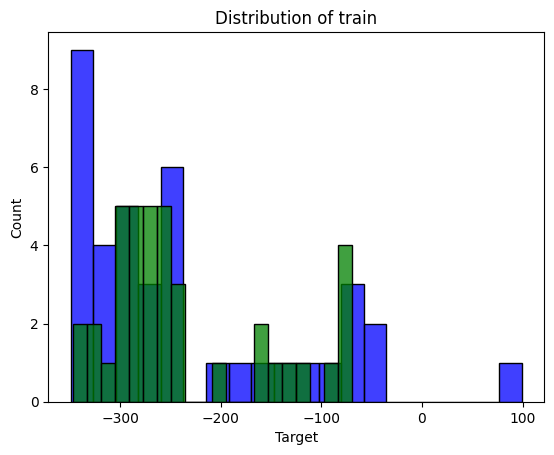

In [ ]:
sns.histplot(df_diff_cat['Target'][y_train.index], color = 'blue', bins = 20)
sns.histplot(df_diff_cat['Base'][y_train.index], color = 'green', bins = 20)
plt.title('Distribution of train')

Text(0.5, 1.0, 'Distribution of test')

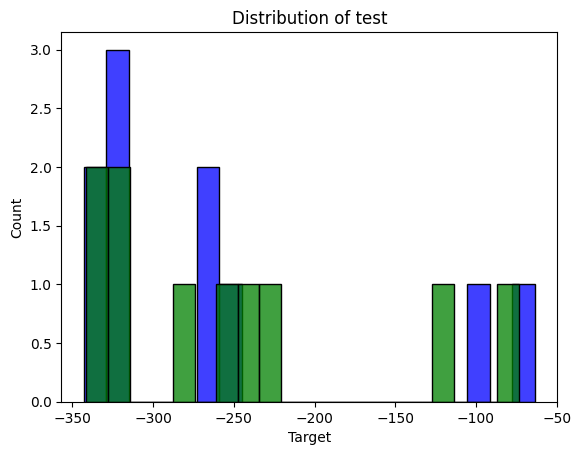

In [ ]:
sns.histplot(df_diff_cat['Target'][y_test.index], color = 'blue', bins = 20)
sns.histplot(df_diff_cat['Base'][y_test.index], color = 'green', bins = 20)
plt.title('Distribution of test')

##### log y

Cat

In [ ]:
df_log_cat = df_diff_cat.copy()
df_log_cat['Target'] = np.log(df_log_cat['Target'] + 1000)
df_log_cat['Base'] = np.log(df_log_cat['Base'] + 1000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_log_cat.drop(['Target', 'Group'], axis = 1), df_log_cat.Target, test_size=0.2, stratify= df_log_cat['Group'], random_state=42)

df_models_log_cat = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str, scaler = True):
    if scaler == True:
      scaler = StandardScaler()
      model.fit(scaler.fit_transform(X_tr), y_tr)
      y_pred_train = model.predict(scaler.transform(X_tr))
      y_pred_test = model.predict(scaler.transform(X_te))
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    else:
      model.fit(X_tr, y_tr)
      y_pred_train = model.predict(X_tr)
      y_pred_test = model.predict(X_te)
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    df_models_log_cat.loc[len(df_models_log_cat.index)] = [f'{model_name}_{scaler}', r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')
make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression', scaler = False)
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge', scaler = False)
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso', scaler = False)
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet', scaler = False)
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting', scaler = False)
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest', scaler = False)
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost', scaler = False)
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost, scaler = False')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN', scaler = False)
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM', scaler = False)

Learning rate set to 0.024523
0:	learn: 0.1342547	total: 3.19ms	remaining: 3.19s
1:	learn: 0.1332473	total: 6.49ms	remaining: 3.24s
2:	learn: 0.1322661	total: 7.07ms	remaining: 2.35s
3:	learn: 0.1310762	total: 7.61ms	remaining: 1.9s
4:	learn: 0.1302632	total: 12.7ms	remaining: 2.53s
5:	learn: 0.1293505	total: 13.9ms	remaining: 2.3s
6:	learn: 0.1281571	total: 15.6ms	remaining: 2.22s
7:	learn: 0.1273740	total: 17.4ms	remaining: 2.16s
8:	learn: 0.1265353	total: 19.3ms	remaining: 2.12s
9:	learn: 0.1256066	total: 27.3ms	remaining: 2.71s
10:	learn: 0.1248652	total: 29.3ms	remaining: 2.64s
11:	learn: 0.1236240	total: 31.1ms	remaining: 2.56s
12:	learn: 0.1227862	total: 33.6ms	remaining: 2.55s
13:	learn: 0.1221108	total: 34.9ms	remaining: 2.46s
14:	learn: 0.1213565	total: 36.3ms	remaining: 2.39s
15:	learn: 0.1206641	total: 37.6ms	remaining: 2.31s
16:	learn: 0.1197813	total: 39.2ms	remaining: 2.27s
17:	learn: 0.1191373	total: 41.1ms	remaining: 2.24s
18:	learn: 0.1184800	total: 43.5ms	remaining: 

In [ ]:
df_models_log_cat

Algorithm  r2_train   r2_test  mae_train  \
0           LinearRegression_StandardScaler()  0.553635  0.884426  49.192179   
1                      Ridge_StandardScaler()  0.550231  0.929380  48.272654   
2                      Lasso_StandardScaler() -0.004333 -0.029968  87.012971   
3                 ElasticNet_StandardScaler() -0.004333 -0.029968  87.012971   
4           GradientBoosting_StandardScaler()  0.999504  0.895156   2.012975   
5               RandomForest_StandardScaler()  0.886611  0.910663  21.939053   
6                    XGBoost_StandardScaler()  0.999981  0.837756   0.374844   
7                   CatBoost_StandardScaler()  0.999985  0.681354   0.352993   
8                        KNN_StandardScaler()  0.389852  0.485325  60.626958   
9                        SVM_StandardScaler()  0.679528  0.478779  53.299196   
10                     LinearRegression_False  0.553635  0.884426  49.192179   
11                                Ridge_False  0.323329  0.387888  67.237366   
12                                Lasso_False -0.004333 -0.029968  87.012971   
13                           ElasticNet_False -0.004333 -0.029968  87.012971   
14                     GradientBoosting_False  0.999504  0.895156   2.012975   
15                         RandomForest_False  0.886611  0.910663  21.939053   
16                              XGBoost_False  0.999981  0.837756   0.374844   
17  CatBoost, scaler = False_StandardScaler()  0.999985  0.681354   0.352993   
18                                  KNN_False  0.271379  0.029411  66.038696   
19                                  SVM_False  0.219157  0.078674  72.573456   

     mae_test  
0   21.537216  
1   18.424953  
2   79.450270  
3   79.450270  
4   22.904016  
5   22.334155  
6   34.782454  
7   40.357397  
8   48.888074  
9   59.370266  
10  21.537216  
11  53.487608  
12  79.450270  
13  79.450270  
14  22.904016  
15  22.334155  
16  34.782454  
17  40.357397  
18  69.663325  
19  67.994683

XG

In [ ]:
df_log_xg = df_diff_xg.copy()
df_log_xg['Target'] = np.log(df_log_xg['Target'] + 1000)
df_log_xg['Base'] = np.log(df_log_xg['Base'] + 1000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_log_xg.drop(['Target', 'Group'], axis = 1), df_log_xg.Target, test_size=0.2, stratify= df_log_xg['Group'], random_state=42)

df_models_log_xg = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str, scaler = True):
    if scaler == True:
      scaler = StandardScaler()
      model.fit(scaler.fit_transform(X_tr), y_tr)
      y_pred_train = model.predict(scaler.transform(X_tr))
      y_pred_test = model.predict(scaler.transform(X_te))
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    else:
      model.fit(X_tr, y_tr)
      y_pred_train = model.predict(X_tr)
      y_pred_test = model.predict(X_te)
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    df_models_log_xg.loc[len(df_models_log_xg.index)] = [f'{model_name}_{scaler}', r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')
make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression', scaler = False)
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge', scaler = False)
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso', scaler = False)
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet', scaler = False)
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting', scaler = False)
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest', scaler = False)
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost', scaler = False)
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost', scaler = False)
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN', scaler = False)
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM', scaler = False)

Learning rate set to 0.024523
0:	learn: 0.1340338	total: 4.39ms	remaining: 4.38s
1:	learn: 0.1330601	total: 5.9ms	remaining: 2.94s
2:	learn: 0.1319965	total: 7.65ms	remaining: 2.54s
3:	learn: 0.1307973	total: 9.23ms	remaining: 2.3s
4:	learn: 0.1300721	total: 10.9ms	remaining: 2.17s
5:	learn: 0.1291615	total: 12.5ms	remaining: 2.06s
6:	learn: 0.1281872	total: 14.2ms	remaining: 2.02s
7:	learn: 0.1274472	total: 16.3ms	remaining: 2.02s
8:	learn: 0.1266577	total: 17.2ms	remaining: 1.89s
9:	learn: 0.1258150	total: 19ms	remaining: 1.88s
10:	learn: 0.1251562	total: 20.7ms	remaining: 1.86s
11:	learn: 0.1243418	total: 22.6ms	remaining: 1.86s
12:	learn: 0.1234445	total: 24.5ms	remaining: 1.86s
13:	learn: 0.1226009	total: 26.1ms	remaining: 1.84s
14:	learn: 0.1217484	total: 28.7ms	remaining: 1.89s
15:	learn: 0.1209525	total: 30.1ms	remaining: 1.85s
16:	learn: 0.1198740	total: 31.9ms	remaining: 1.84s
17:	learn: 0.1190771	total: 33.6ms	remaining: 1.83s
18:	learn: 0.1183683	total: 35.4ms	remaining: 1.

In [ ]:
df_models_log_xg

Algorithm  r2_train   r2_test  mae_train  \
0   LinearRegression_StandardScaler()  0.550574  0.799475  48.658726   
1              Ridge_StandardScaler()  0.546329  0.877384  47.808100   
2              Lasso_StandardScaler() -0.004332 -0.029969  87.013109   
3         ElasticNet_StandardScaler() -0.004332 -0.029969  87.013109   
4   GradientBoosting_StandardScaler()  0.999345  0.826496   2.408906   
5       RandomForest_StandardScaler()  0.873969  0.876379  23.495863   
6            XGBoost_StandardScaler()  0.999978  0.893078   0.373287   
7           CatBoost_StandardScaler()  0.999971  0.626115   0.479963   
8                KNN_StandardScaler()  0.418042  0.711840  57.402263   
9                SVM_StandardScaler()  0.686972  0.466253  53.335015   
10             LinearRegression_False  0.550573  0.799476  48.658765   
11                        Ridge_False  0.315015  0.398370  67.103040   
12                        Lasso_False -0.004332 -0.029969  87.013109   
13                   ElasticNet_False -0.004332 -0.029969  87.013109   
14             GradientBoosting_False  0.999345  0.826496   2.408906   
15                 RandomForest_False  0.873969  0.876379  23.495863   
16                      XGBoost_False  0.999978  0.893078   0.373287   
17                     CatBoost_False  0.999971  0.626115   0.479963   
18                          KNN_False  0.271379  0.029783  66.038696   
19                          SVM_False  0.209486  0.053531  72.737666   

     mae_test  
0   35.631747  
1   28.834927  
2   79.450520  
3   79.450520  
4   30.884715  
5   30.191515  
6   24.967408  
7   47.591393  
8   43.526989  
9   64.039165  
10  35.631631  
11  53.476401  
12  79.450520  
13  79.450520  
14  30.884715  
15  30.191515  
16  24.967408  
17  47.591393  
18  69.579749  
19  68.324010

RF

In [ ]:
df_log_rf = df_diff_rf.copy()
df_log_rf['Target'] = np.log(df_log_rf['Target'] + 1000)
df_log_rf['Base'] = np.log(df_log_rf['Base'] + 1000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_log_rf.drop(['Target', 'Group'], axis = 1), df_log_rf.Target, test_size=0.2, stratify= df_log_rf['Group'], random_state=42)

df_models_log_rf = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str, scaler = True):
    if scaler == True:
      scaler = StandardScaler()
      model.fit(scaler.fit_transform(X_tr), y_tr)
      y_pred_train = model.predict(scaler.transform(X_tr))
      y_pred_test = model.predict(scaler.transform(X_te))
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    else:
      model.fit(X_tr, y_tr)
      y_pred_train = model.predict(X_tr)
      y_pred_test = model.predict(X_te)
      r2_train = r2_score(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      r2_test = r2_score(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
      mae_train = mean_absolute_error(np.exp(y_tr)-1000, np.exp(y_pred_train)-1000)
      mae_test = mean_absolute_error(np.exp(y_te)-1000, np.exp(y_pred_test)-1000)
    df_models_log_rf.loc[len(df_models_log_rf.index)] = [f'{model_name}_{scaler}', r2_train, r2_test, mae_train, mae_test]


make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge')
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso')
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet')
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting')
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest')
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost')
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost')
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN')
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM')
make_model(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression', scaler = False)
make_model(X_train, X_test, y_train, y_test, Ridge(random_state = 42), 'Ridge', scaler = False)
make_model(X_train, X_test, y_train, y_test, Lasso(random_state = 42), 'Lasso', scaler = False)
make_model(X_train, X_test, y_train, y_test, ElasticNet(random_state = 42), 'ElasticNet', scaler = False)
make_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoosting', scaler = False)
make_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42), 'RandomForest', scaler = False)
make_model(X_train, X_test, y_train, y_test, xgboost.XGBRegressor(random_state = 42), 'XGBoost', scaler = False)
make_model(X_train, X_test, y_train, y_test, catboost.CatBoostRegressor(random_state = 42), 'CatBoost', scaler = False)
make_model(X_train, X_test, y_train, y_test, KNeighborsRegressor(), 'KNN', scaler = False)
make_model(X_train, X_test, y_train, y_test, svm.SVR(), 'SVM', scaler = False)

Learning rate set to 0.024523
0:	learn: 0.1338892	total: 3.44ms	remaining: 3.44s
1:	learn: 0.1327951	total: 16.7ms	remaining: 8.32s
2:	learn: 0.1316603	total: 18.2ms	remaining: 6.06s
3:	learn: 0.1305348	total: 19.7ms	remaining: 4.89s
4:	learn: 0.1297318	total: 21.9ms	remaining: 4.37s
5:	learn: 0.1289897	total: 23ms	remaining: 3.81s
6:	learn: 0.1280817	total: 24.8ms	remaining: 3.52s
7:	learn: 0.1271662	total: 26.5ms	remaining: 3.28s
8:	learn: 0.1262621	total: 28.3ms	remaining: 3.11s
9:	learn: 0.1253949	total: 29.7ms	remaining: 2.94s
10:	learn: 0.1247639	total: 31.3ms	remaining: 2.81s
11:	learn: 0.1238381	total: 32.9ms	remaining: 2.71s
12:	learn: 0.1230654	total: 34.7ms	remaining: 2.64s
13:	learn: 0.1222142	total: 36.4ms	remaining: 2.56s
14:	learn: 0.1213737	total: 38.6ms	remaining: 2.53s
15:	learn: 0.1205644	total: 39.6ms	remaining: 2.44s
16:	learn: 0.1194525	total: 41.2ms	remaining: 2.38s
17:	learn: 0.1187755	total: 42.7ms	remaining: 2.33s
18:	learn: 0.1180684	total: 44.3ms	remaining: 

In [ ]:
df_models_log_rf

Algorithm  r2_train   r2_test  mae_train  \
0   LinearRegression_StandardScaler()  0.506717  0.793121  52.257923   
1              Ridge_StandardScaler()  0.504587  0.823895  51.511933   
2              Lasso_StandardScaler() -0.004333 -0.029968  87.012971   
3         ElasticNet_StandardScaler() -0.004333 -0.029968  87.012971   
4   GradientBoosting_StandardScaler()  0.999286  0.490788   2.432241   
5       RandomForest_StandardScaler()  0.885895  0.578953  21.943682   
6            XGBoost_StandardScaler()  0.999976  0.398680   0.425444   
7           CatBoost_StandardScaler()  0.999982  0.390124   0.381117   
8                KNN_StandardScaler()  0.360608  0.312042  62.007064   
9                SVM_StandardScaler()  0.688063  0.351708  52.913245   
10             LinearRegression_False  0.506717  0.793121  52.257923   
11                        Ridge_False  0.314605  0.349061  67.458695   
12                        Lasso_False -0.004333 -0.029968  87.012971   
13                   ElasticNet_False -0.004333 -0.029968  87.012971   
14             GradientBoosting_False  0.999286  0.490788   2.432241   
15                 RandomForest_False  0.885895  0.578953  21.943682   
16                      XGBoost_False  0.999976  0.398680   0.425444   
17                     CatBoost_False  0.999982  0.390124   0.381117   
18                          KNN_False  0.271379 -0.058227  66.038696   
19                          SVM_False  0.213319  0.063613  72.637849   

     mae_test  
0   33.899994  
1   30.977185  
2   79.450270  
3   79.450270  
4   42.454355  
5   41.376121  
6   47.800331  
7   55.182195  
8   54.321895  
9   66.846326  
10  33.899994  
11  56.123238  
12  79.450270  
13  79.450270  
14  42.454355  
15  41.376121  
16  47.800331  
17  55.182195  
18  71.571375  
19  67.982133

#####Final

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diff_cat.drop(['Target', 'Group'], axis = 1), df_diff_cat.Target, test_size=0.2, stratify= df_diff_cat['Group'], random_state=42)
model = Ridge(random_state = 42)
model.fit(X_train, y_train)
y_pred= model.predict(df_diff_cat.drop(['Target', 'Group'], axis = 1))

r2_f = r2_score(y_pred, df_diff_cat.Target)

mae_f = mean_absolute_error(df_diff_cat.Target, y_pred)

print(f'R2 score - {r2_f}')
print(f'MAE - {mae_f}')


R2 score - 0.3883882050779853
MAE - 41.392399033864905
